# 一、任务目的

1. 对数据集进行预处理，包括数据清理及特征选择等； 
2. 利用决策树、朴素贝叶斯、神经网络、支持向量机及 K 近邻算法实现分类预测任务。 

# 二、数据集

泰坦尼克号的沉没是历史上最著名的沉船事件之一。1912 年 4 月 15 日，泰坦尼克号在航行中撞上冰山沉没，2224 名乘客和船员中 1502 人遇难。本数据集中包含训练集和测试集两个文件，每个文件中记录了乘客相关信息。

# 数据集说明

gender_submission.csv 为提交文件示例

train.csv 训练集

test.csv 测试集

## 数据集背景

1912年4月15日，泰坦尼克号在其处女航中与冰山相撞后沉没。在2224名乘客和船员中，只有722人（32.5%）幸存。这种极低的幸存率的部分原因是缺乏足够数量的救生艇。

虽然幸存肯定涉及运气因素，但一些群体（如妇女、儿童、上层阶级等）可能比其他人更容易幸存。目标是根据性别、年龄和社会地位等因素，使用机器学习来预测哪些乘客在悲剧中幸存下来。

泰坦尼克号的官员发出了 "妇女和儿童优先 "的命令，通过救生艇疏散乘客。然而，当时并没有制定有组织的疏散计划。

事实上，船长没有发出 "弃船 "的总命令，没有公共广播系统，也没有救生艇演习。许多乘客没有意识到他们处于任何迫在眉睫的危险之中，一些人不得不被船员或工作人员劝出他们的船舱。

救生艇被分隔成不同的舱位，一等舱的乘客救生艇比其他两个舱位的多。

我们知道，三等舱的乘客更难进入救生艇，因为三等舱的乘客区与船上的一等和二等区是隔开的。这实际上是由于美国的移民法，它要求移民（主要是三等舱）在抵达美国后与其他乘客分开处理。因此，三等舱乘客必须穿过迷宫般的楼梯和走廊才能到达救生艇甲板。

鉴于这些事实，已经可以推测出，Sex, Pclass, Age可能是最重要的特征。

空一行pandoc转换的好

## 数据集各列含义

PassengerId 每位乘客的ID，train.csv为1-891，test.csv为892-1309

Survival **标签/因变量** 是否幸存 0 = No, 1 = Yes


1. Pclass 船票的级别 1 = 1st, 2 = 2nd, 3 = 3rd 价格由高到低
2. Name 姓名
3. Sex 性别 
4. Age 当年年龄 
5. SibSp 泰坦尼克号上的兄弟姐妹/配偶数量
6. parch 泰坦尼克号上的父母/子女数量 
7. Ticket 票证号码，船票号码
8. Fare 乘客票价（总价，一张船票有可能让好几个乘客上船） 
9. Cabin 客舱编号 
10. Embarked 登船港，上船地点 C = Cherbourg, Q = Queenstown, S = Southampton 



# 三、任务内容

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

import sweetviz
import pandas as pd
import numpy as np

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")



In [15]:
my_report = sweetviz.compare([df_train, "Train"], [df_test, "Test"], "Survived")

                                             |          | [  0%]   00:00 -> (? left)

# 0 EDA sweetviz

Exploratory data analysis(EDA) 用于解释数据是怎样的，属性之间的关系是什么等等。

自动生成了一份html报告

In [2]:
my_report.show_html("Report.html")

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 1 下载和导入数据 

载入 Pandas、Numpy 等数据处理相关工具库。从[1]下载训练集和测试集，使用 Pandas 的 read_csv() 方法将数据读入 DataFrame。

使用 shape 属性分别查看训练集和测试集的规模，使用 DataFrame 的 append()方法将两个数据集合并，以便进行数据清洗。 

## InteractiveShell

In [72]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"  #all 输出太多了

In [3]:
df_train.shape
df_test.shape

(891, 12)

(418, 11)

# 2 数据清洗 

使用 DataFrame 的 head()、describe()、info()等方法查看数据样例、数据类型、缺失情况，获取数据项的均值、中位数、最大最小值、标准差；使用 isnull()、sum()方法分析和计量各数据项缺失值比例，使用 heatmap()方法对缺失值情况进行可视化；分情况讨论，使用 fillna()等方法，对于不同数据类型、缺失比例采用不同的缺失值处理方法： 
- 如果是数值型数据，用平均值取代； 
- 如果是分类数据，用最常见的类别取代； 
- 对于缺失值比例较大的数据项（如船舱号，Cabin），增加 Unknown 类型，代表缺失
值； 
- 删除缺少多个数据项的样本。 

## 查看数据

In [6]:
df_train.head()
df_test.head()

df_train.describe()
df_test.describe()

df_train.info()
df_test.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## 处理 字符串型/文本 特征



### Name

#### Name_Title

In [49]:
temp=[i.split(",")[1] for i in df_train["Name"] ]#取后一半
name_list = [i.split(".")[0].strip() for i in temp]#取后一半的前一半
df_train["Title"] = pd.DataFrame(name_list)

df_train["Title"].value_counts()
# sns.countplot(df_train["Title"])
df_train["Title"].value_counts().index.tolist()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

['Mr',
 'Miss',
 'Mrs',
 'Master',
 'Dr',
 'Rev',
 'Mlle',
 'Major',
 'Col',
 'the Countess',
 'Capt',
 'Ms',
 'Sir',
 'Lady',
 'Mme',
 'Don',
 'Jonkheer']

#### 可视化

<AxesSubplot:xlabel='Title', ylabel='Count'>

Mr        517
Miss      182
Mrs       125
Master     40
Rare       14
Dr          7
Rev         6
Name: Title, dtype: int64

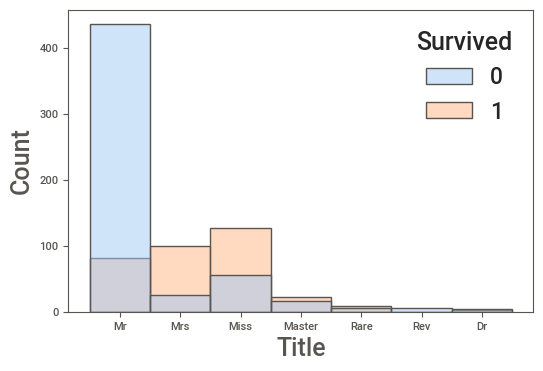

In [50]:
# sns.countplot(df_train["Title"])#对各种Title的人进行count
# plt.setp(g.get_xticklabels(),rotation=45)

rare_title = ['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Major', 'Sir', 'Jonkheer', 'Dona','Mme','Ms','Mlle']
df_train["Title"] = df_train["Title"].replace(rare_title, "Rare")#稀少的类别合并

# sns.barplot(x = df_train["Title"],y = df_train["Survived"])
sns.histplot(data=df_train, x="Title", hue="Survived", palette='pastel')#太浅

df_train["Title"].value_counts()

# dataset.drop(labels = ["Name"],axis = 1 ,inplace = True)



# dataset['dup']=dataset["Title"]
# dataset = pd.get_dummies(dataset,columns = ["dup"],prefix="Title")
#利用pandas实现one-hot encode，Dummy：虚拟
#Title列被替换为多列，这里会自动加prefix_

从上图可以看出，Mr幸存率较低 Mrs和Miss幸存率较高

#### 定义函数  

In [8]:
def convert_title(df):
    temp = [i.split(",")[1] for i in df["Name"]]  #取后一半
    name_list = [i.split(".")[0].strip() for i in temp]  #取后一半的前一半
    df["Name_Title"] = pd.DataFrame(name_list)
    rare_title = ['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Major', 'Sir', 'Jonkheer', 'Dona', 'Mme',
                  'Ms', 'Mlle']
    df["Name_Title"] = df["Name_Title"].replace(rare_title, "Rare")  #稀少的类别合并


# convert_title(df_train)
convert_title(df_append_fillna)

In [ ]:
convert_title(df_train)

### Ticket

如果是纯数字，去掉最后一位（由于维度过多，决定去掉最后两位）

如果前面是字母，仅保留字母

In [59]:
df_train['Ticket'].str.split().str[0].sort_values().drop_duplicates()

504    110152
262    110413
110    110465
430    110564
366    110813
        ...  
226     SW/PP
736     W./C.
92     W.E.P.
219       W/C
540      WE/P
Name: Ticket, Length: 557, dtype: object

需要处理

A./5.
A.5.
A/5

CA
C.A.
CA.

W./C.
W/C

SOTON/O.Q.
SOTON/OQ

等

In [68]:
df_train['Ticket'].str
df_train['Ticket']._accessors
df_train['Ticket'].dt
# AttributeError: Can only use .cat accessor with a 'category' dtype
# AttributeError: Can only use .dt accessor with datetimelike values

{'cat', 'dt', 'sparse', 'str'}

AttributeError: Can only use .dt accessor with datetimelike values

'''

pandas.Series.replace
和
pandas.Series.str.replace

还不一样

regexbool or same types as to_replace, default False
regexbool, default True

一个默认False一个默认True

所以下边如果加[:-1]，得再加两个.str

'''

In [86]:
df_train['Ticket'].str[:-2].str.replace(".","").str.replace("/","").str.strip().str.split().str[0].sort_values().drop_duplicates()
# AttributeError: 'Series' object has no attribute 'strip'
# pandas.Series.replace replace不需要accessor

C:\Users\rui\AppData\Local\Temp/ipykernel_27056/4158107166.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_train['Ticket'].str[:-2].str.replace(".","").str.replace("/","").str.strip().str.split().str[0].sort_values().drop_duplicates()


504      1101
110      1104
430      1105
366      1108
170      1112
        ...  
579     STONO
729    STONO2
226      SWPP
436        WC
745       WEP
Name: Ticket, Length: 195, dtype: object

In [80]:
temp=df_train['Ticket'].str[:-1]
temp.replace(".","")

0             A/5 2117
1              PC 1759
2      STON/O2. 310128
3                11380
4                37345
            ...       
886              21153
887              11205
888          W./C. 660
889              11136
890              37037
Name: Ticket, Length: 891, dtype: object

In [85]:
df_train['Ticket'].str[:-1]
# 去掉最后一位

0             A/5 2117
1              PC 1759
2      STON/O2. 310128
3                11380
4                37345
            ...       
886              21153
887              11205
888          W./C. 660
889              11136
890              37037
Name: Ticket, Length: 891, dtype: object

In [ ]:
df_train['Ticket'].str.replace(".","").replace("/","").str.strip().str.split().str[0]

#### Ticket_Letter

In [ ]:
# i.replace(".","").replace("/","").strip().split(" ")[0]

df_train['Ticket_Letter'] = df_train['Ticket'].str[:-2].str.replace(".","").str.replace("/","").str.strip().str.split().str[0]


# 如果要提取数字信息，则也可以这样做，现在我们对数字票单纯地分为一类。
# df_train['Ticket_Number'] = df_train['Ticket'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
# df_train['Ticket_Number'].fillna(0, inplace=True)

# 将 Ticket_Letter factorize
# df_train['Ticket_Letter'] = pd.factorize(df_train['Ticket_Letter'])[0]

#### 定义函数

In [9]:
def convert_ticket_letter(df):
    df['Ticket_Letter'] = df['Ticket'].str[:-2].str.replace(".", "").str.replace("/", "").str.strip().str.split().str[0]


# convert_ticket_letter(df_train)
convert_ticket_letter(df_append_fillna)

C:\Users\rui\AppData\Local\Temp/ipykernel_6732/1795057562.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Ticket_Letter'] = df['Ticket'].str[:-2].str.replace(".", "").str.replace("/", "").str.strip().str.split().str[0]


### Cabin

可以假设，泰坦尼克号船舱内越深的乘客越有可能死亡。

乘客数据中列出的客舱前缀都是字母A到G，一些背景研究告诉我们，这个字母对应客舱所在的甲板(A更靠近顶部，G更深)。

#### Cabin_Letter

In [33]:
df_train['Cabin_Letter'] = df_train.apply(lambda row:
                                       str(row['Cabin'])[0] if str(row['Cabin'])[0] != 'n'
                                       else row['Cabin'], axis=1)#空值转str为NaN
df_train.sort_values('Cabin_Letter')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinDeck,Cabin_Letter
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,A,A
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,A,A
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C,A,A
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,A,A
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,NaN,NaN
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,NaN,NaN
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN


#### 可视化

C:\Users\rui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin_Letter', ylabel='Survived'>

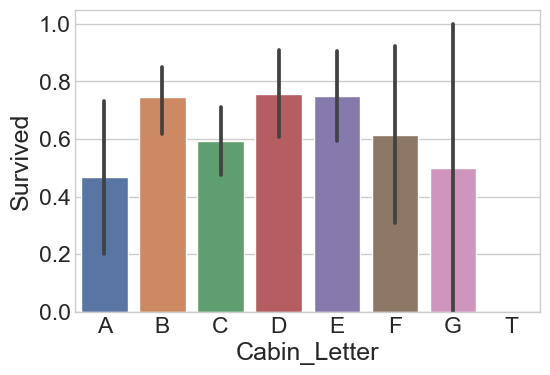

In [34]:
sns.barplot('Cabin_Letter','Survived', data=df_train.sort_values('Cabin_Letter'))

将分类特征Survived 作为均值看着不太明显

还是作为hue比较好，可以看出来比例

C:\Users\rui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CabinDeck', ylabel='Survived'>

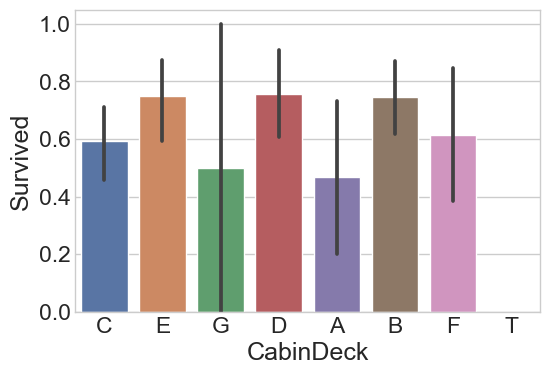

In [31]:
sns.barplot('Cabin_Letter','Survived', data=df_train)

<AxesSubplot:xlabel='Cabin_Letter', ylabel='Count'>

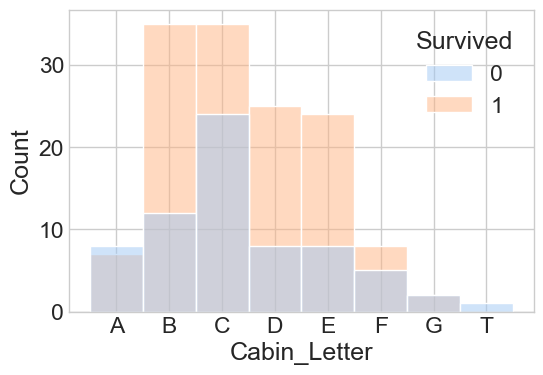

In [36]:
sns.histplot(data=df_train.sort_values('Cabin_Letter'), x="Cabin_Letter", hue="Survived", palette='pastel')#太浅

从上图可以看出，B D E舱幸存率较高

In [55]:
df_train.drop(['Title'],axis = 1 ,inplace=True)

#### 定义函数

In [10]:
def convert_cabin_letter(df):
    df['Cabin_Letter'] = df.apply(lambda row:
                                              str(row['Cabin'])[0] if str(row['Cabin'])[0] != 'n'
                                              else str(row['Cabin']), axis=1)  #空值转str为NaN# 误解了，需要加str()，否则看到的NaN不是字符串

# convert_cabin_letter(df_train)
convert_cabin_letter(df_append_fillna)

#### sweetviz

In [41]:
my_report_Cabin_Letter = sweetviz.analyze(df_train, target_feat="Survived")
my_report_Cabin_Letter.show_html('Report_Cabin_Letter.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report_Cabin_Letter.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 缺失值可视化

<AxesSubplot:>

<AxesSubplot:>

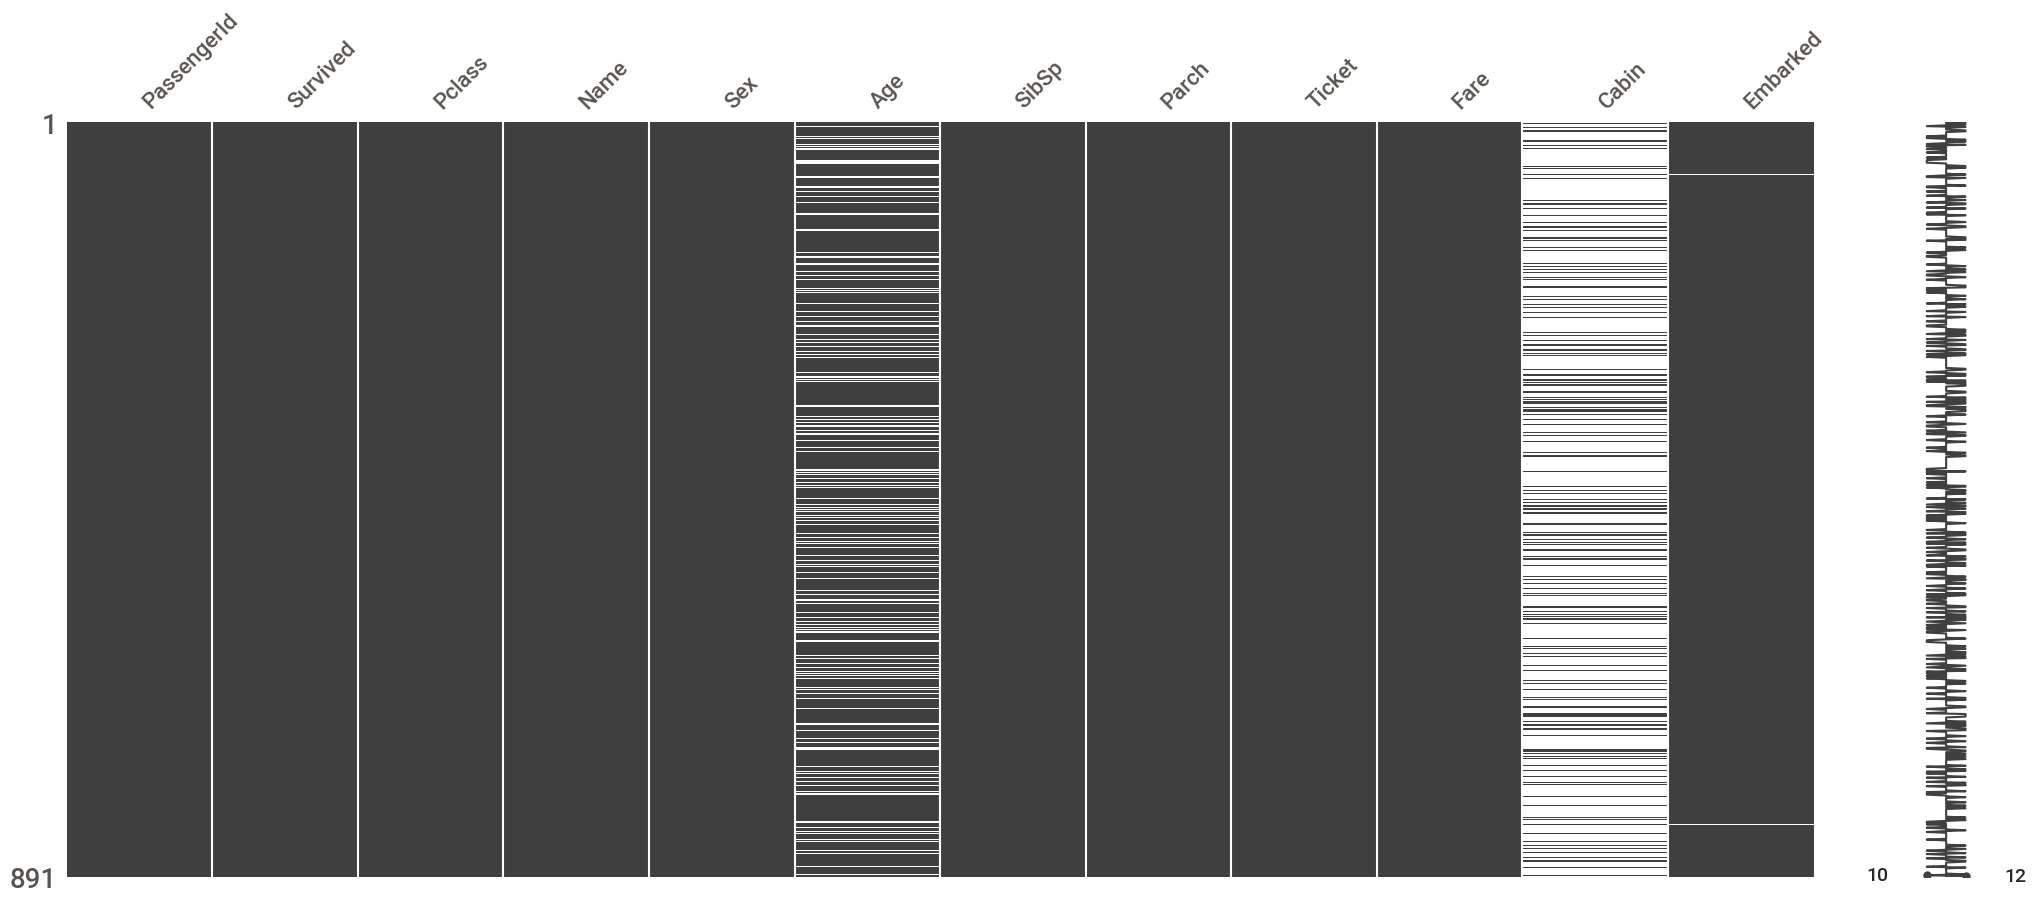

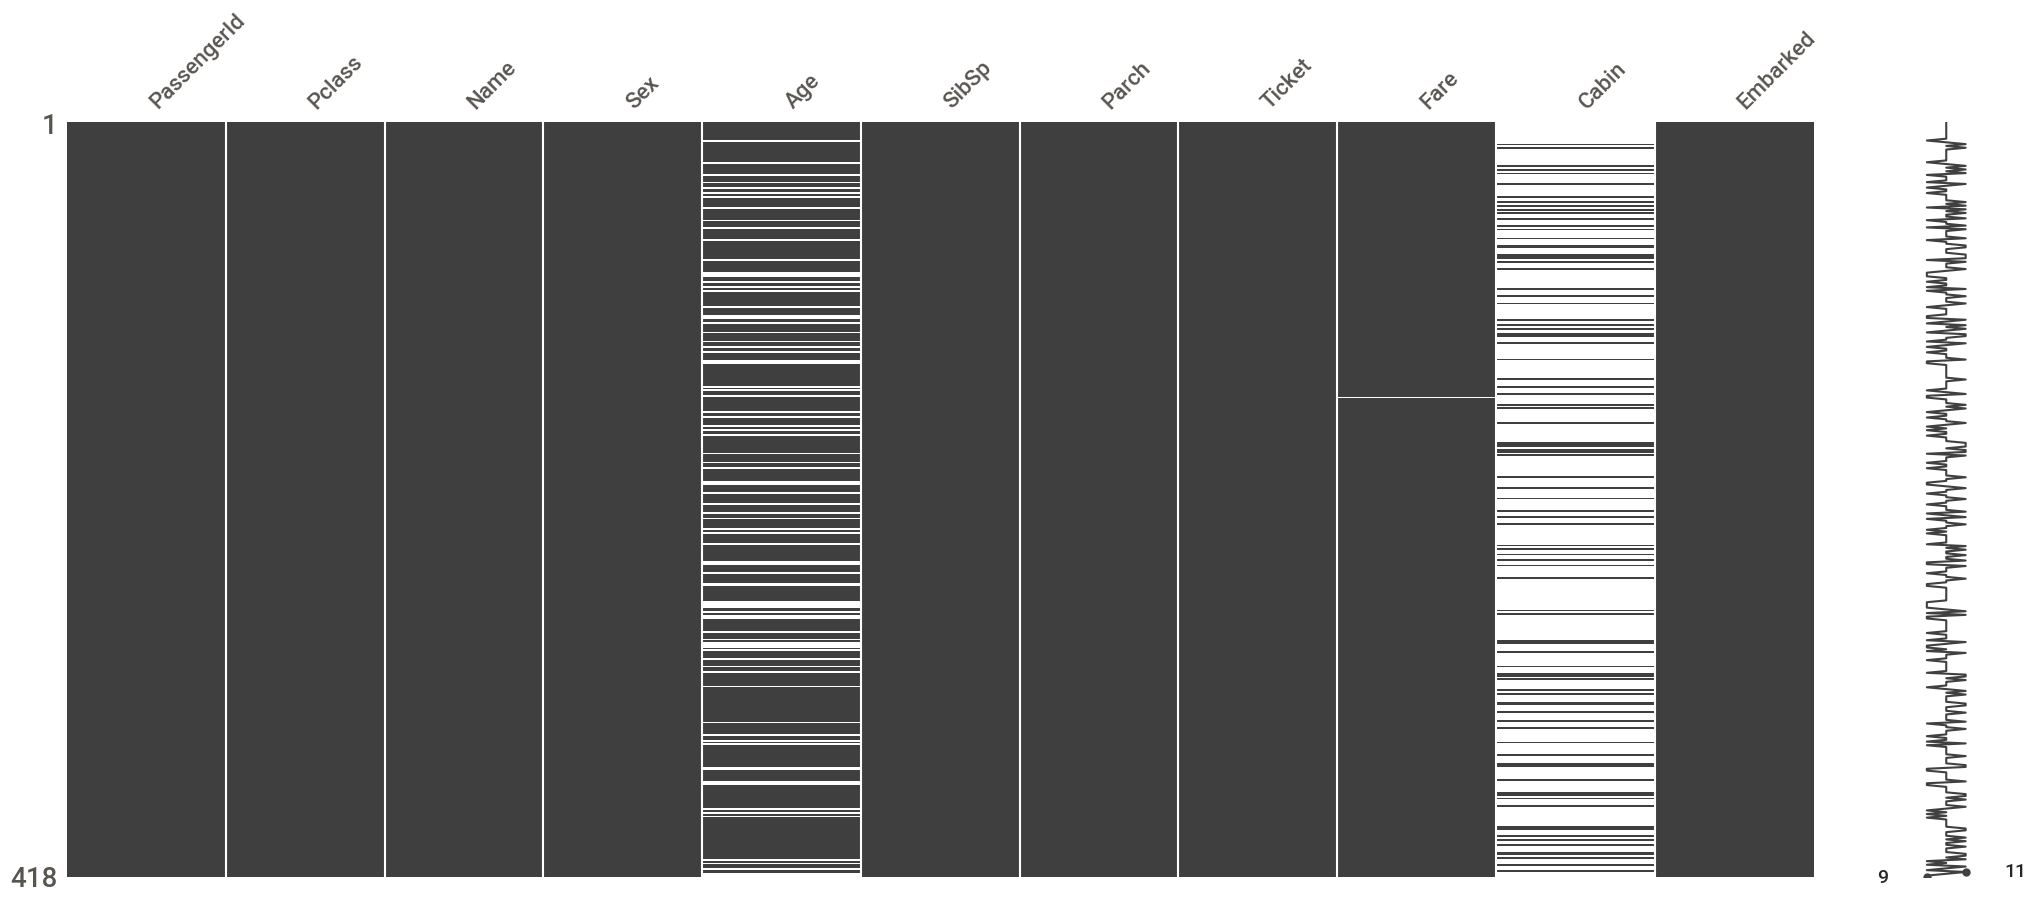

In [67]:
import missingno as msno
msno.matrix(df_train)
msno.matrix(df_test)

从上图可以看出，Cabin缺失值最多，其次是Age

## 合并train test

In [3]:
#将实验数据和预测数据合并
df_append=df_train.append(df_test,ignore_index=True)#重置索引列
df_append.describe()

C:\Users\rui\AppData\Local\Temp/ipykernel_30584/648323.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append=df_train.append(df_test,ignore_index=True)#重置索引列


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## 处理缺失值

### Fare Embarked

这个两列缺失值较少，可以直接取:

numerical:均值 中位数

categorical:众数

pandas.Series.mode

Returns
**Series**
Modes of the Series in sorted order.

In [3]:
def fill_Fare_Embarked(df_append):
    df_append_fillna = df_append.copy()
    
    #
    temp = df_append.groupby('Pclass').transform(np.mean)  #dataframe (1309, 6)
    #transform(),对各组求mean，但是仍保留那些列、及顺序
    #temp为一个dataframe
    df_append_fillna['Fare'] = df_append_fillna[['Fare']].fillna(temp)

    temp = df_append['Embarked'].mode().iloc[0]  #第0行
    df_append_fillna['Embarked'].fillna(temp, inplace=True)
    
    return df_append_fillna


df_append_fillna = fill_Fare_Embarked(df_append)

#fillna(value=None, method=None, axis=None, inplace=False, limit=None): 填充Series或DataFrame中的空值。
# value: 表示填充的值，可以是一个指定值，也可以是字典, Series或DataFrame。

# del df_append

C:\Users\rui\AppData\Local\Temp/ipykernel_6732/4104179984.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = df_append.groupby('Pclass').transform(np.mean)  #dataframe (1309, 6)


In [36]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_append_fillna.isnull().sum()#查看缺失值个数

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [21]:
# temp = (df_append['Pclass'] == 3) & (df_append['Embarked'] == 'S')
# df_append[temp]['Fare'].mean()

14.435422064777327

In [ ]:
var_dummies = ['Sex','Pclass','Embarked','if_cabin']
train_data['Pclass'] = train_data.Pclass.astype('object')
dummies = pd.get_dummies(train_data[var_dummies])
df = train_data.join(dummies)
df.drop(var_dummies,axis = 1 ,inplace=True)

### convert_dummies 定义函数

In [5]:
# #
# def convert_dummies(df_convert, var_dummies):
#     dummies = pd.get_dummies(df_convert[var_dummies],prefix=var_dummies)#这个不处理数字列
#     df_convert = df_convert.join(dummies)
#     df_convert.drop(var_dummies, axis=1, inplace=True)
#     # display(df_convert.head())
#     # 传参修改不了，不知道为什么，得返回
#     # 可能是df_convert =导致的
#     return df_convert

#
def convert_dummies(df_convert, var_dummies):
    dummies = pd.get_dummies(df_convert,columns=var_dummies)#,prefix=var_dummies
    # display(dummies)

    # df_convert = df_convert.join(dummies)
    # df_convert.drop(var_dummies, axis=1, inplace=True)
    # display(df_convert.head())
    # 传参修改不了，不知道为什么，得返回
    # 可能是df_convert =导致的
    return dummies

### Age

Age缺失值比例为20%，数量比较多，可以采用 RandomForestRegressor 模型训练来预测填充

In [6]:
# 由sweetviz分析图可以看出，Fare Pclass Embarked SibSp Parch对Age的相关性较强，选择这5个特征训练RandomForestRegressor

# df_age_pre=df_append[['Age','Fare','Pclass','Embarked','SibSp','Parch']]


#

from sklearn.ensemble import RandomForestRegressor

def fill_Age(df):
    age_df = df[['Age','Fare','Pclass','Embarked','SibSp','Parch']]

    age_df=convert_dummies(age_df,['Embarked'])

    display(age_df.head())
    # 分为已知年龄和未知年龄
    known_age = age_df[age_df['Age'].notnull()]
    unknown_age = age_df[age_df['Age'].isnull()]

    y=known_age['Age']
    X=known_age.iloc[:,1:]#第1列以后的所有列

    rfr = RandomForestRegressor()
    rfr.fit(X,y)

    predicted_age = rfr.predict(unknown_age.iloc[:,1:])
    df['Age'][df['Age'].isnull()] = predicted_age

    return df

df_append_fillna = fill_Age(df_append_fillna)

#ValueError: Input contains NaN, infinity or a value too large for dtype('float32').
#需要先处理Fare

,Age,Fare,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,3,1,0,0,0,1
1,38.0,71.2833,1,1,0,1,0,0
2,26.0,7.9250,3,0,0,0,0,1
3,35.0,53.1000,1,1,0,0,0,1
4,35.0,8.0500,3,0,0,0,0,1


C:\Users\rui\AppData\Local\Temp/ipykernel_6732/4290889332.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull()] = predicted_age


## 查看缺失值个数

In [7]:
df_append_fillna.isnull().sum()#查看缺失值个数

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

# 3 可视化分析 

载入数据可视化分析工具库 Seaborn、Matplotlib；尝试使用直方图分析年龄、性别、仓位、头衔、登船港口、家庭人数等数据项和幸存之间的关联；尝试得出有益于特征构建的结论，比如以年龄为例，可以发现： 
- 婴儿（小于 4 岁）具有较高的幸存几率； 
- 老年人（大于 80 岁）具有较高的幸存几率； 
- 15 岁至 25 岁之间的成年人幸存几率最低。 

## Pclass Age Fare

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

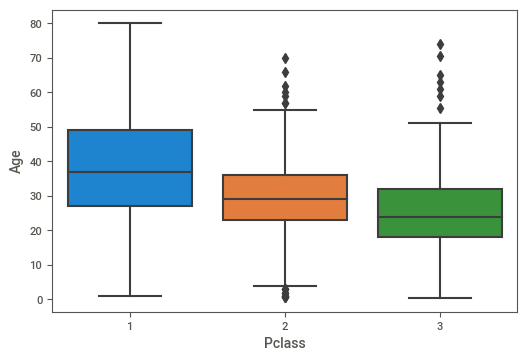

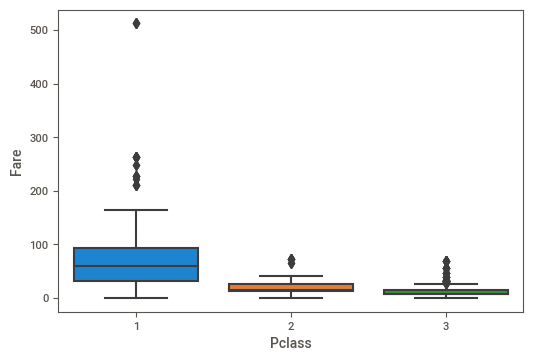

In [15]:
sns.boxplot(x="Pclass", y="Age", data=df_train)
plt.figure()
sns.boxplot(x="Pclass", y="Fare", data=df_train)

## Sex Fare

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

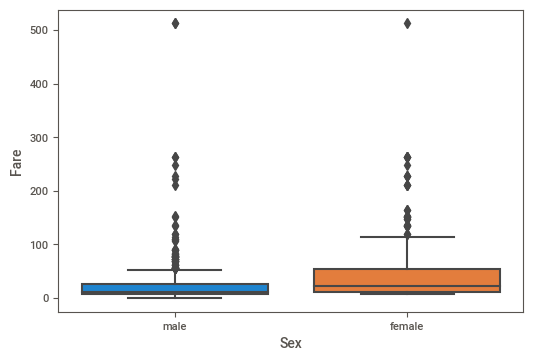

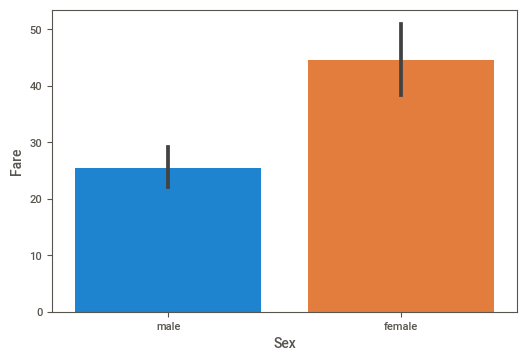

In [17]:
sns.boxplot(x="Sex", y="Fare", data=df_train)#离群点，压缩的太厉害了，看不出来关系
plt.figure()
sns.barplot(x="Sex", y="Fare", data=df_train)

## Age Survived

<AxesSubplot:xlabel='Age', ylabel='Survived'>

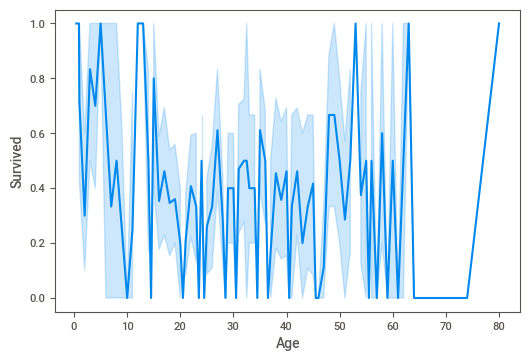

In [22]:
sns.lineplot(data=df_train, x="Age",y="Survived")

<AxesSubplot:xlabel='Age', ylabel='Survived'>

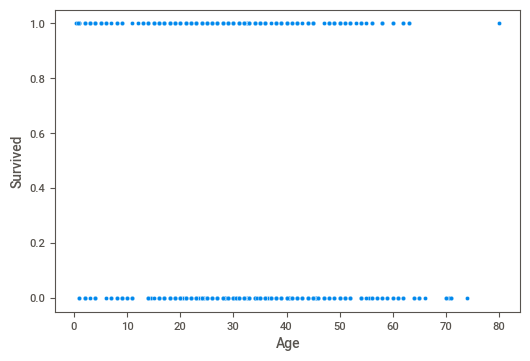

In [23]:
sns.scatterplot(data=df_train, x="Age",y="Survived")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

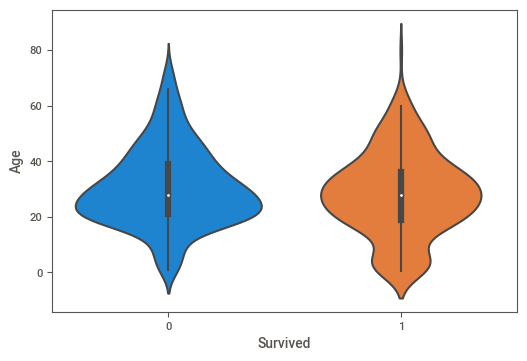

In [25]:
sns.violinplot(data=df_train, x="Survived",y="Age")

<AxesSubplot:xlabel='Age', ylabel='Count'>

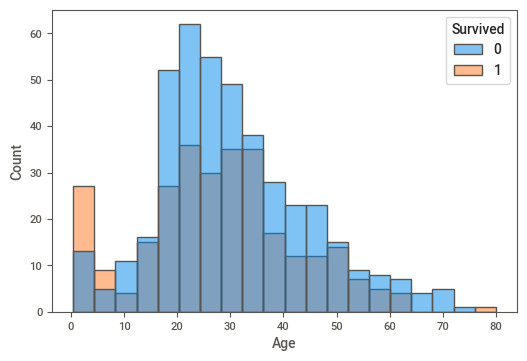

In [26]:
sns.histplot(data=df_train, x="Age", hue="Survived")

<AxesSubplot:xlabel='Age', ylabel='Survived'>

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='Age', ylabel='Density'>

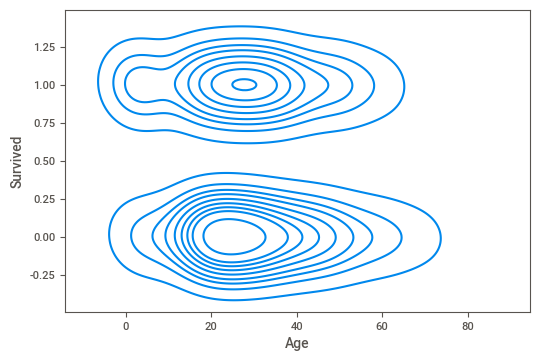

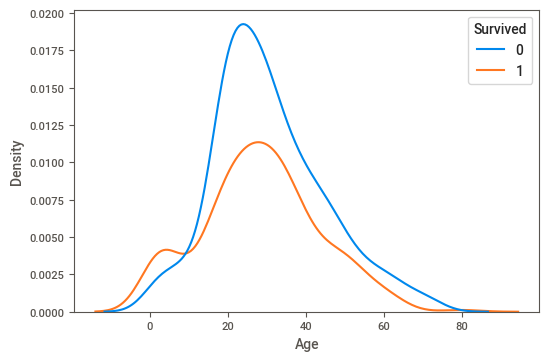

In [27]:
sns.kdeplot(data=df_train, x="Age",y="Survived")
plt.figure()
# sns.kdeplot(data=df_train, x="Survived",y="Age")
sns.kdeplot(data=df_train, x="Age",hue="Survived")

上面这几个图，大部分都不容易看出来关系

使用Distribution plots，以x=numerical variable, hue=categorical variable，效果比较好

观察histplot和kdeplot，可以看出，当年龄大概处于0-10岁时，幸存率较高

## SibSp Parch

<AxesSubplot:xlabel='SibSp', ylabel='count'>

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='SibSp', ylabel='Percent'>

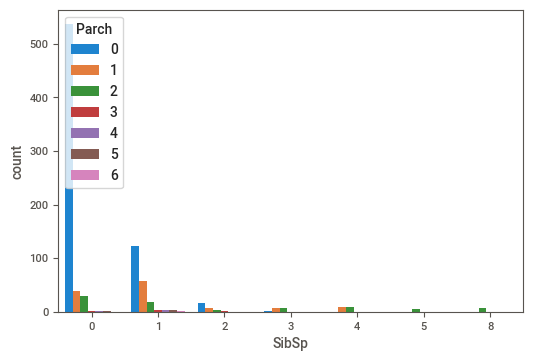

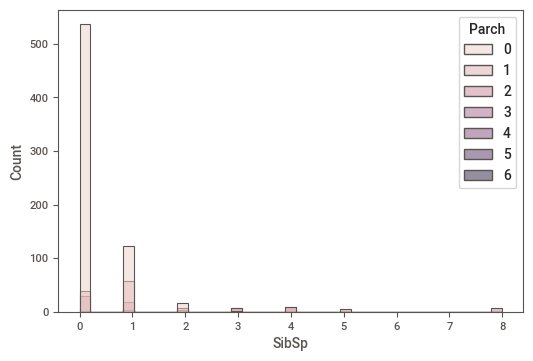

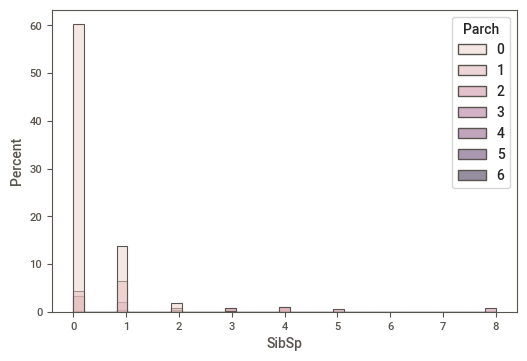

In [36]:
sns.countplot(data=df_train, x="SibSp", hue="Parch")#countplot没法堆叠
# sns.kdeplot(data=df_train, x="Age",hue="Survived")
plt.figure()
sns.histplot(data=df_train, x="SibSp", hue="Parch")
plt.figure()
sns.histplot(data=df_train, x="SibSp", hue="Parch",stat="percent")

从上图可以看出，当SibSp为0时，Parch也大概率为0

<AxesSubplot:xlabel='Parch'>

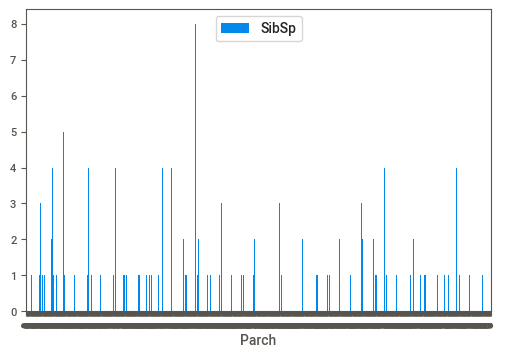

In [38]:
# sns.histplot(data=df_train, x="SibSp", hue="Parch", palette='CMRmap')
df_train.plot(x="Parch",y="SibSp",kind="bar")

In [53]:
df_train.groupby("Parch").apply(lambda x:x[:])
temp=df_train.groupby('SibSp')['Parch']
temp2=df_train.groupby('SibSp')
temp.apply(pd.DataFrame)#输出不太对

PassengerId  Survived  Pclass  \
Parch                                      
0     0              1         0       3   
      1              2         1       1   
      2              3         1       3   
      3              4         1       1   
      4              5         0       3   
...                ...       ...     ...   
5     25            26         1       3   
      610          611         0       3   
      638          639         0       3   
      885          886         0       3   
6     678          679         0       3   

                                                        Name     Sex   Age  \
Parch                                                                        
0     0                              Braund, Mr. Owen Harris    male  22.0   
      1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
      2                               Heikkinen, Miss. Laina  female  26.0   
      3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
      4                             Allen, Mr. William Henry    male  35.0   
...                                                      ...     ...   ...   
5     25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0   
      610  Andersson, Mrs. Anders Johan (Alfrida Konstant...  female  39.0   
      638             Panula, Mrs. Juha (Maria Emilia Ojala)  female  41.0   
      885               Rice, Mrs. William (Margaret Norton)  female  39.0   
6     678            Goodwin, Mrs. Frederick (Augusta Tyler)  female  43.0   

           SibSp  Parch            Ticket     Fare Cabin Embarked  Age_1  
Parch                                                                     
0     0        1      0         A/5 21171   7.2500   NaN        S   32.0  
      1        1      0          PC 17599  71.2833   C85        C   48.0  
      2        0      0  STON/O2. 3101282   7.9250   NaN        S   36.0  
      3        1      0            113803  53.1000  C123        S   45.0  
      4        0      0            373450   8.0500   NaN        S   45.0  
...          ...    ...               ...      ...   ...      ...    ...  
5     25       1      5            347077  31.3875   NaN        S   48.0  
      610      1      5            347082  31.2750   NaN        S   49.0  
      638      0      5           3101295  39.6875   NaN        S   51.0  
      885      0      5            382652  29.1250   NaN        Q   49.0  
6     678      1      6           CA 2144  46.9000   NaN        S   53.0  

[891 rows x 13 columns]

,0,1,2,3,4,5,8
0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
886,0.0,NaN,NaN,NaN,NaN,NaN,NaN
887,0.0,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,2.0,NaN,NaN,NaN,NaN,NaN
889,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df_train['Age_1']=df_train['Age']+10
sns.lineplot(data=df_train, x="Fare", y=['Age','Age_1'])
#ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 891 and the vector passed to `y` has length 2.

## 100% stacked bar chart

Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,0.883224,0.062500,0.047697,0.001645,0.001645,0.003289,NaN
1,0.588517,0.272727,0.090909,0.014354,0.014354,0.014354,0.004785
2,0.571429,0.250000,0.142857,0.035714,NaN,NaN,NaN
3,0.125000,0.437500,0.437500,NaN,NaN,NaN,NaN
4,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN
5,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
8,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='SibSp'>

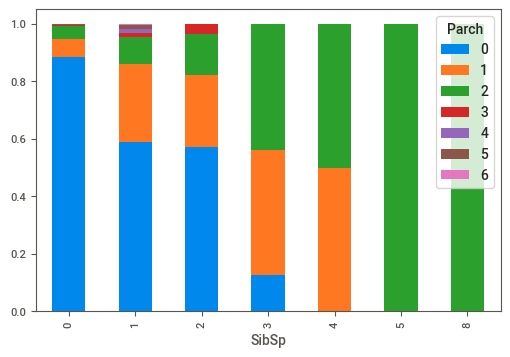

In [54]:
temp = df_train.groupby('SibSp')['Parch'].value_counts(normalize=True).unstack('Parch')
temp
temp.plot.bar(stacked=True)

## SibSp Age&Fare

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='Age', ylabel='Count'>

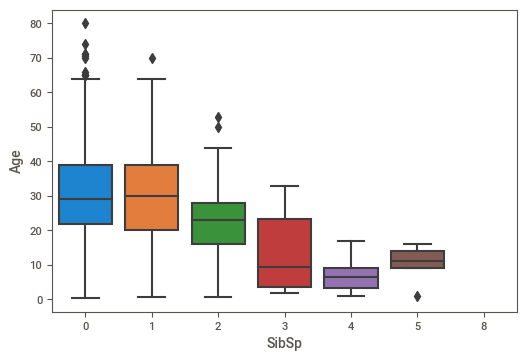

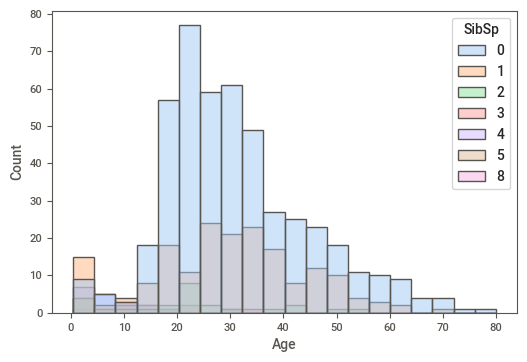

In [59]:
sns.boxplot(x="SibSp", y="Age", data=df_train)
plt.figure()
# sns.boxplot(x="Pclass", y="Fare", data=df_train)

sns.histplot(data=df_train, x="Age", hue="SibSp", palette='pastel')#太浅

从上图可以看出，当年龄较小时0-10，大部分是有1或2个 兄弟姐妹/配偶 的

## Parch Age&Fare

<AxesSubplot:xlabel='Age', ylabel='Count'>

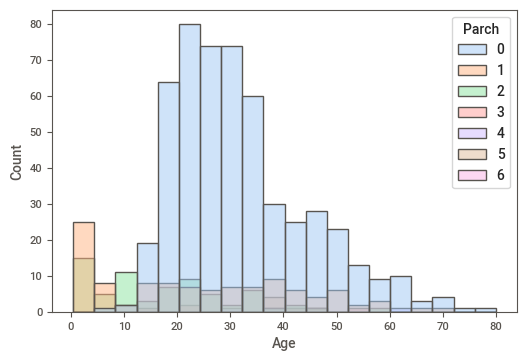

In [60]:
sns.histplot(data=df_train, x="Age", hue="Parch", palette='pastel')#太浅

从上图可以看出，当年龄较小时0-10，大部分是有1或2个 父母(/子女) 的

## Embarked Age&Fare

<AxesSubplot:xlabel='Age', ylabel='Count'>

<Figure size 2000x1500 with 0 Axes>

<AxesSubplot:xlabel='Fare', ylabel='Count'>

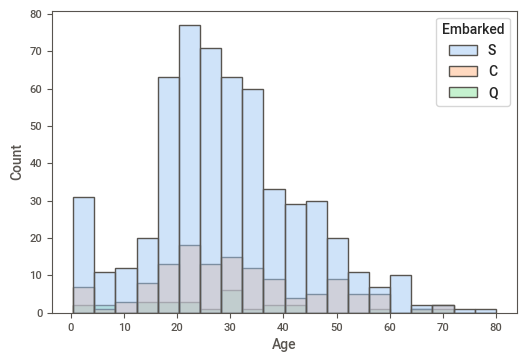

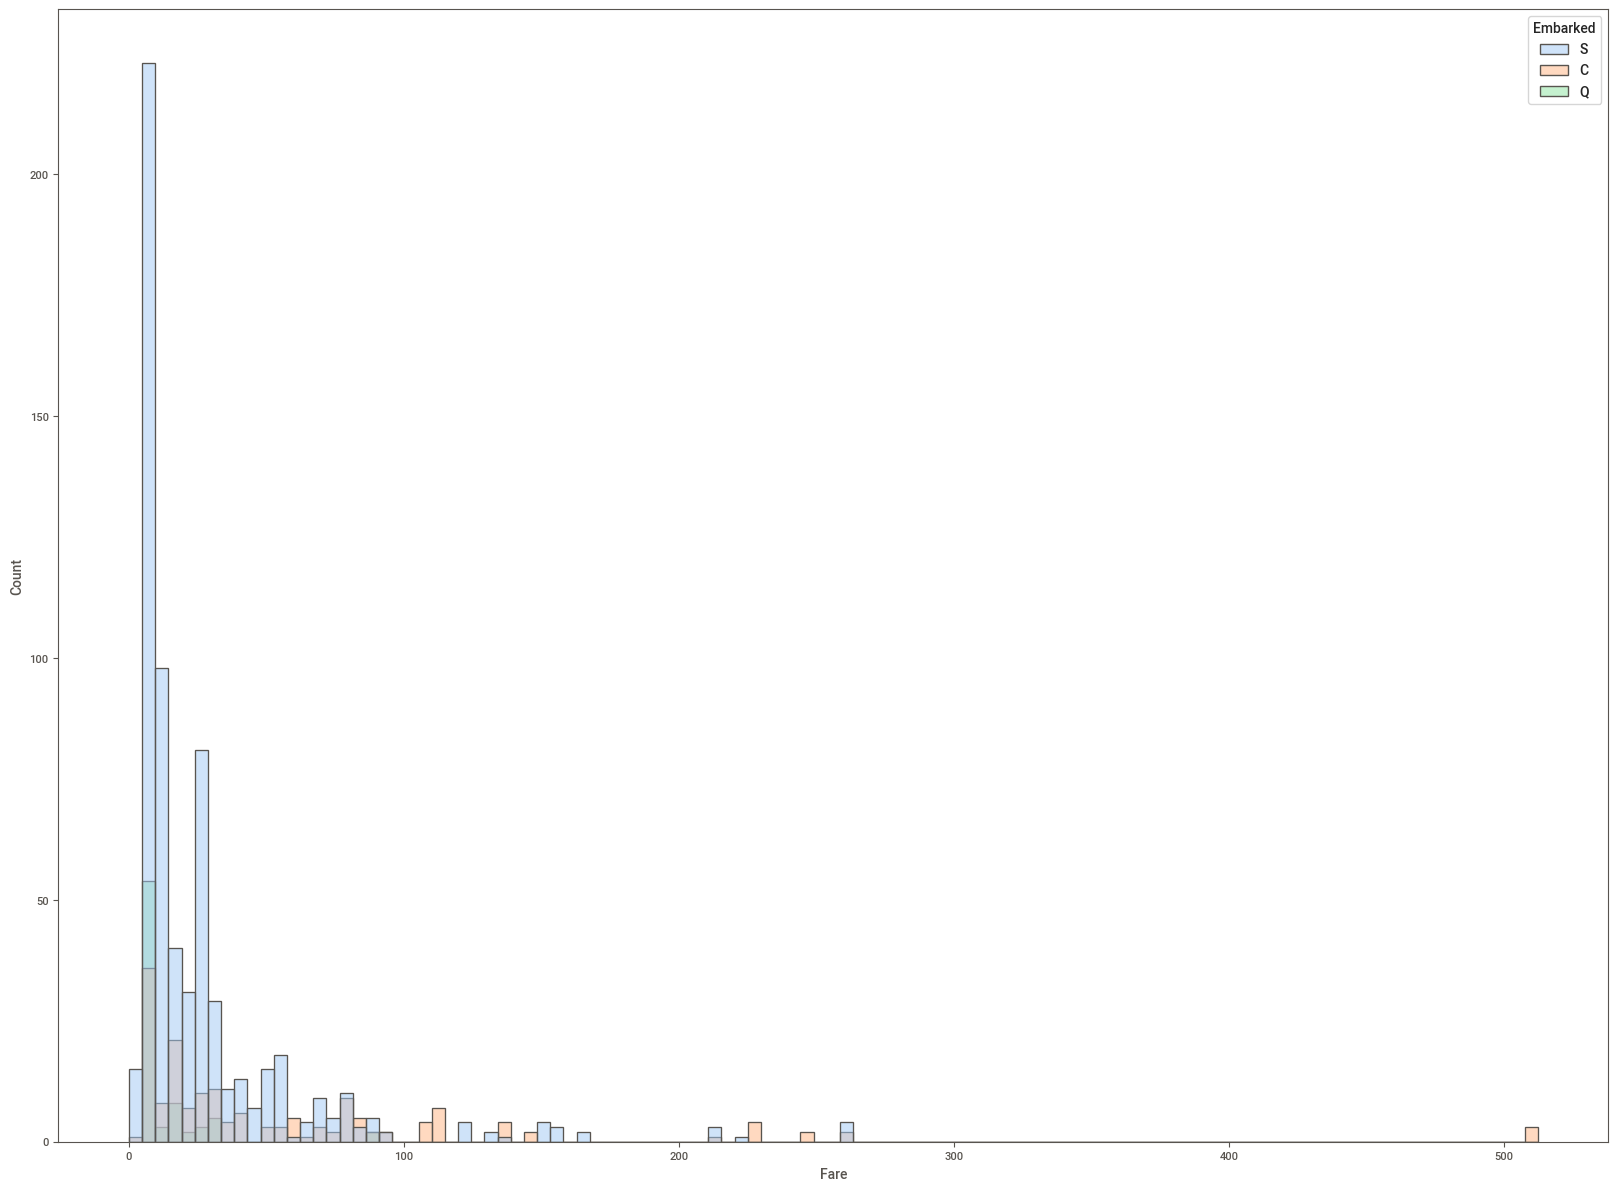

In [64]:
sns.histplot(data=df_train, x="Age", hue="Embarked", palette='pastel')#太浅
plt.figure(figsize = (20,15))
sns.histplot(data=df_train, x="Fare", hue="Embarked", palette='pastel')#太浅

从上图可以看出，票价很高的多在C港口和S港口上船

Q港口票价多较低

# 4 特征提取 

对于不同类型的特征视情况进行进一步处理，如： 
- 范围较小的数值型特征，直接使用数值或采用分箱方法转换为分类特征，如年龄、家庭人数等； 
- 范围较大的数值型特征，进行归一化处理，如船票价格等； 
- 二值型的分类特征，映射为 0 和 1，如性别； 
- 多于两类的分类特征，使用 one-hot 编码，如登船港口、客舱等级； 
- 字符串型特征，先进行关键字提取，再进行 one-hot 编码，如从头衔数据项中提取职业和爵位等信息。


**二值型的分类特征**，可以不进行OneHotEncoder，LabelEncoder即可

**特征提取 放在 处理缺失值 前做，比较好，处理缺失值时可能要使用模型训练**

---

关于为什么合并SibSp和Parch
从数学上来说可以自动用PCA降维
但是这里是从意义上来说，直接求和更有意义，更有可解释性

### 查看DISTINCT值的数量

In [94]:
# df_train.value_counts()


for column in df_train.columns:
    # df_train[column].drop_duplicates()
    print('------------------------')
    column
    # print(df_train[column].unique())
    df_train[column].drop_duplicates().shape[0]

------------------------


'PassengerId'

891

------------------------


'Survived'

2

------------------------


'Pclass'

3

------------------------


'Name'

891

------------------------


'Sex'

2

------------------------


'Age'

89

------------------------


'SibSp'

7

------------------------


'Parch'

7

------------------------


'Ticket'

681

------------------------


'Fare'

248

------------------------


'Cabin'

148

------------------------


'Embarked'

4

------------------------


'Cabin_Letter'

9

------------------------


'Name_Title'

7

------------------------


'Ticket_Letter'

195

### drop PassengerId Name Ticket Cabin
#### 定义函数

In [75]:
def drop_columns(df,var_drop):
    df.drop(var_drop, axis=1, inplace=True)


# drop_PNTC(df_train)
drop_columns(df_append_fillna,['PassengerId', 'Name', 'Ticket', 'Cabin'])

### auto dectect OneHot/dummies

In [26]:
from sweetviz.type_detection import determine_feature_type
from sweetviz.series_analyzer import get_counts
from sweetviz.sv_types import FeatureType

source_counts = get_counts(df_append_fillna['Survived'])
source_type = determine_feature_type(df_append_fillna['Survived'], source_counts,
                                     FeatureType.TYPE_UNKNOWN, "SOURCE")  #不能直接传"UNKNOWN"
str(source_type)
source_type

'TYPE_BOOL'

<FeatureType.TYPE_BOOL: 'BOOL'>

In [27]:
categorical_list=[]

for column in df_append_fillna.columns:
    source_counts = get_counts(df_append_fillna[column])
    source_type = determine_feature_type(df_append_fillna[column], source_counts,
                                     FeatureType.TYPE_UNKNOWN, "SOURCE")  #不能直接传"UNKNOWN"
    column
    source_type


# age_df=convert_dummies(age_df,['Embarked'])

'Survived'

<FeatureType.TYPE_BOOL: 'BOOL'>

'Pclass'

<FeatureType.TYPE_CAT: 'CATEGORICAL'>

'Sex'

<FeatureType.TYPE_CAT: 'CATEGORICAL'>

'Age'

<FeatureType.TYPE_NUM: 'NUMERIC'>

'SibSp'

<FeatureType.TYPE_CAT: 'CATEGORICAL'>

'Parch'

<FeatureType.TYPE_CAT: 'CATEGORICAL'>

'Fare'

<FeatureType.TYPE_NUM: 'NUMERIC'>

'Embarked'

<FeatureType.TYPE_CAT: 'CATEGORICAL'>

'Name_Title'

<FeatureType.TYPE_CAT: 'CATEGORICAL'>

'Ticket_Letter'

<FeatureType.TYPE_TEXT: 'TEXT'>

'Cabin_Letter'

<FeatureType.TYPE_CAT: 'CATEGORICAL'>

#### 定义函数

In [28]:
#
def convert_dummies(df_convert, var_dummies):
    dummies = pd.get_dummies(df_convert,columns=var_dummies)#,prefix=var_dummies
    display(dummies)
    
    # df_convert = df_convert.join(dummies)
    # df_convert.drop(var_dummies, axis=1, inplace=True)
    # display(df_convert.head())
    # 传参修改不了，不知道为什么，得返回
    # 可能是df_convert =导致的
    return dummies


def convert_categorical_dummies(df):
    categorical_list = []
    for column in df.columns:
        source_counts = get_counts(df[column])
        source_type = determine_feature_type(df[column], source_counts,
                                             FeatureType.TYPE_UNKNOWN, "SOURCE")  #不能直接传"UNKNOWN"
        if source_type.value == 'CATEGORICAL' or source_type.value == 'TEXT':
            categorical_list.append(column)
    df_append_fillna_dummies = convert_dummies(df, categorical_list)
    return df_append_fillna_dummies


df_append_fillna_dummies = convert_categorical_dummies(df_append_fillna)

# ValueError: columns overlap but no suffix specified: Index(['Pclass', 'SibSp', 'Parch'], dtype='object')

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Ticket_Letter_WEP,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_C,Cabin_Letter_D,Cabin_Letter_E,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_T,Cabin_Letter_nan
0,0.0,22.000000,7.2500,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1.0,38.000000,71.2833,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1.0,26.000000,7.9250,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,35.000000,53.1000,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0.0,35.000000,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,29.423791,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1305,NaN,39.000000,108.9000,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1306,NaN,38.500000,7.2500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1307,NaN,29.423791,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


## 关于是否应该对连续变量 分箱/离散化

discretize a Continuous Variable

一般在建立**分类**模型时，需要对连续变量离散化，特征离散化后，模型会更稳定，降低了模型过拟合的风险。比如在建立申请评分卡模型时用logsitic作为基模型就需要对连续变量进行离散化，离散化通常采用分箱法。

分箱的有以下重要性及其优势：

1离散特征的增加和减少都很容易，易于模型的快速迭代；

2稀疏向量**内积乘法**运算速度快，计算结果方便存储，容易扩展；

3离散化后的特征对异常数据有很强的鲁棒性：比如一个特征是年龄>30是1，否则0。如果特征没有离散化，一个异常数据“年龄300岁”会给模型造成很大的干扰；

4逻辑回归属于广义线性模型，表达能力受限；单变量离散化为N个后，每个变量有单独的权重，相当于为模型引入了非线性，能够提升模型表达能力，加大拟合； **?**

5离散化后可以进行**特征交叉**，由M+N个变量变为M*N个变量，进一步引入非线性，提升表达能力；

6特征离散化后，**模型会更稳定**，比如如果对用户年龄离散化，20-30作为一个区间，不会因为一个用户年龄长了一岁就变成一个完全不同的人。**当然处于区间相邻处的样本会刚好相反**，所以怎么划分区间是门学问；

7特征离散化以后，起到了简化了逻辑回归模型的作用，**降低了模型过拟合的风险**。

8**可以将缺失作为独立的一类**带入模型。

9将所有变量变换到相似的尺度上。

缺点：

1信息的损失。装箱会丢失信息。如果可能的话，应该避免。如果想进行最佳拟合或进行最佳调整，应该使用连续变量

优点：

1连续模型涉及分布的参数族，这意味着存在着可能适合或不适合数据的分布假设；相比之下，在离散情况下，**多项分布**适合所有可能的概率分布

所有的连续数据**在某种程度上都是离散的**，因为数字计算表示的精度是有限的。我们充其量只能在某种有限的精度水平上表示连续变量（例如浮点运算下的标准精度）



# 5 特征选择 

通过 DataFrame 类的 corr()方法计算特征与是否幸存的相关性；

使用 sklearn 工具库中的 ExtraTreesClassifier 类计算特征的重要性；

使用 Seaborn 工具库进行可视化分析，去除相关性较低的特征，最终保留年龄、性别、客舱等级、登船港口、头衔、船票价格、家庭人数等特征。 

## corr

### 定义函数

C:\Users\rui\AppData\Local\Temp/ipykernel_30584/2574634935.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()  #返回相关系数矩阵 (13,13)


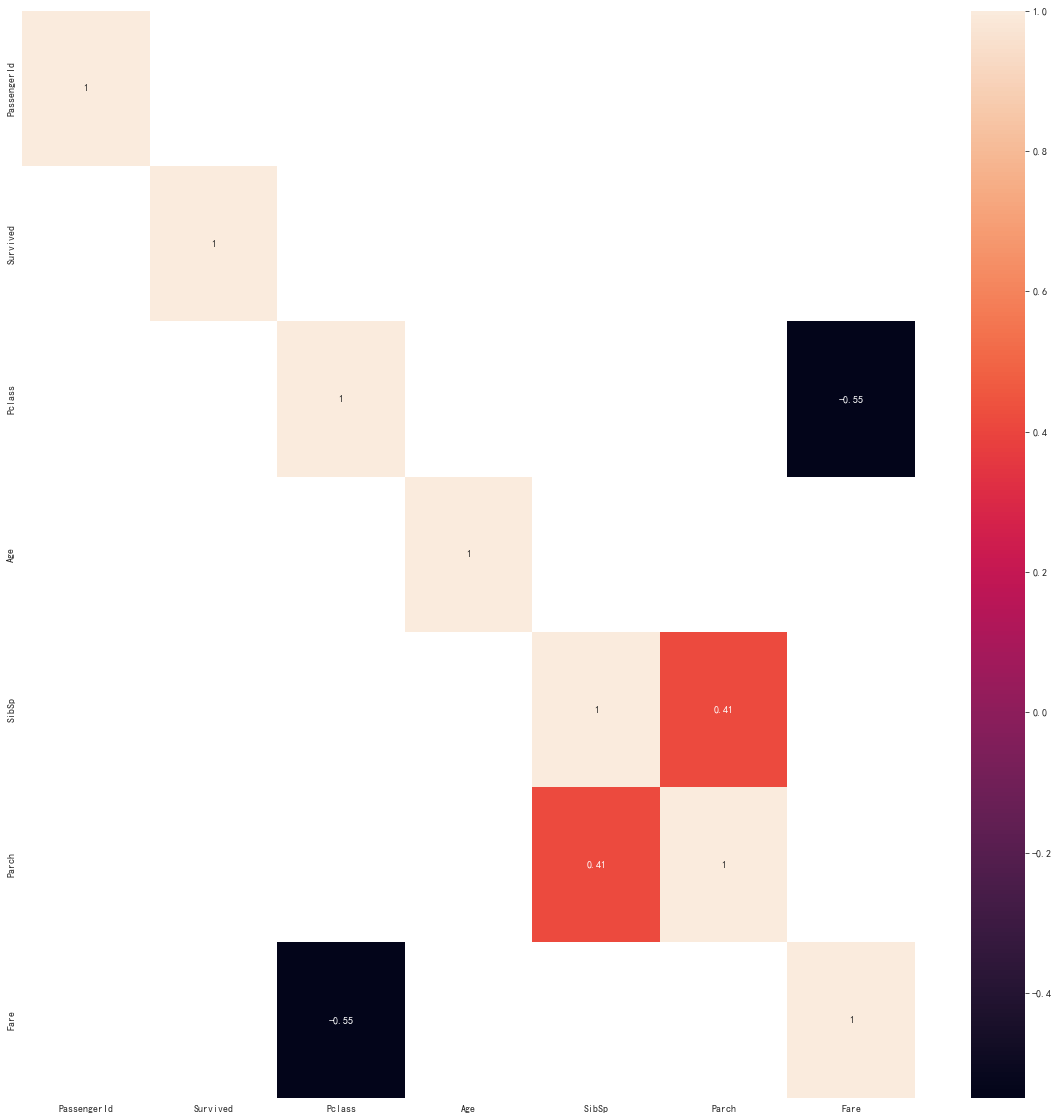

In [35]:
def plot_corr(df):
    plt.figure(figsize=(20, 20))
    corr = df.corr()  #返回相关系数矩阵 (13,13)
    dataplot = sns.heatmap(corr[(corr > 0.4) | (corr < -0.4)], annot=True)  #annot=True 添加corr数值
    plt.show()


plot_corr(df_train)

### 取 df_train_fillna_dummies

In [9]:
train_len = df_train.shape[0]
df_train_fillna_dummies = df_append_fillna_dummies[:train_len]

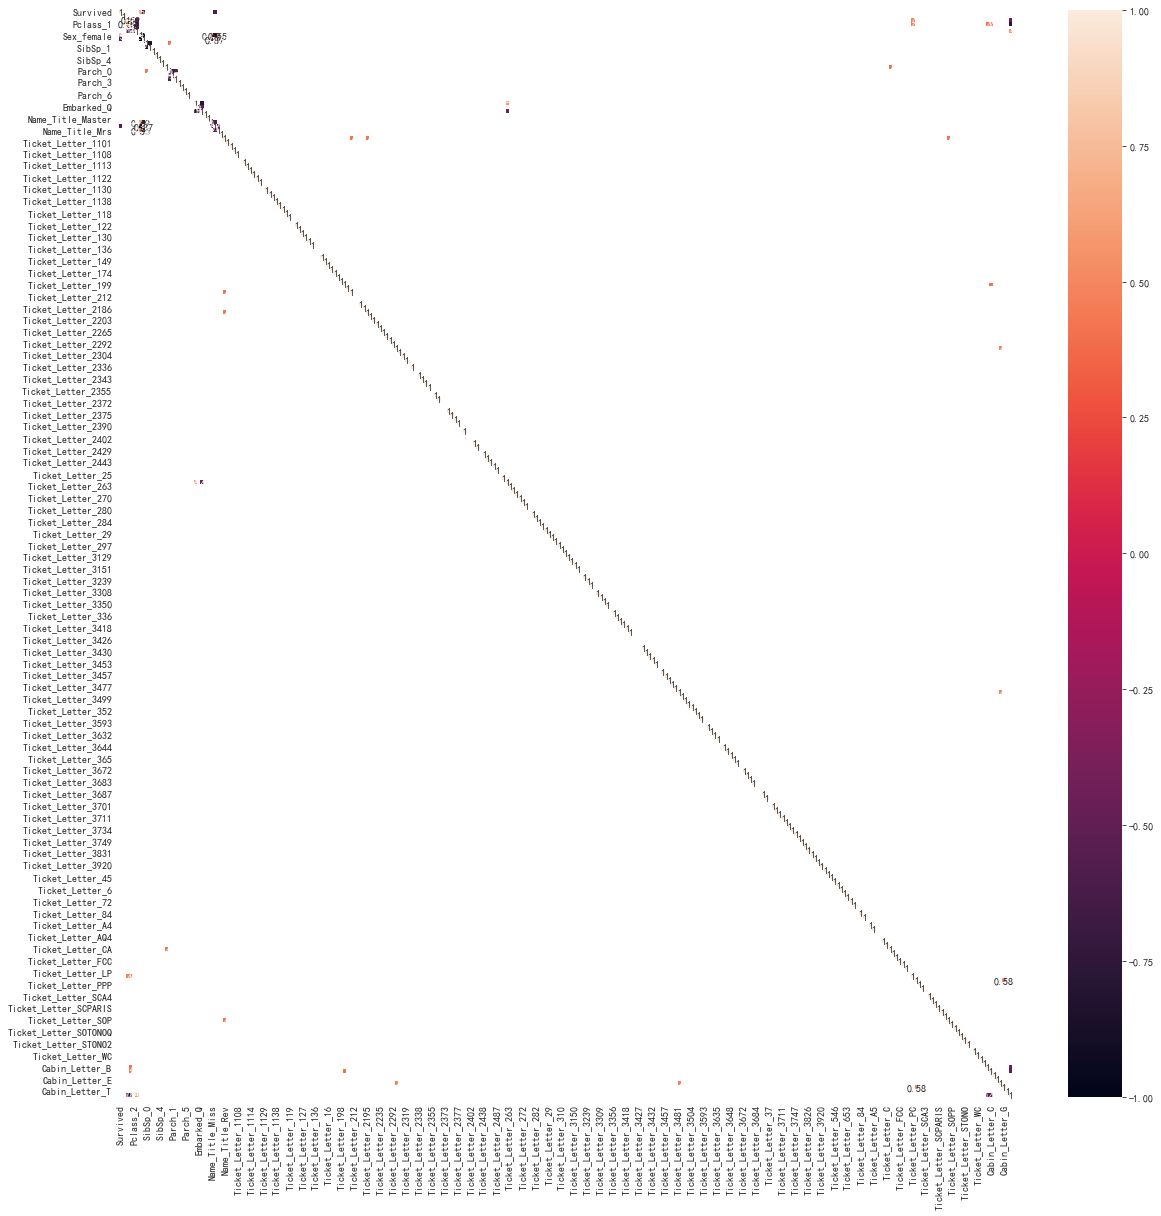

In [34]:
plot_corr(df_train_fillna_dummies)

特征太多

### sort corr 

In [47]:
df_train_fillna_dummies.corr()['Survived'].abs().sort_values(ascending=False)

Survived                1.000000
Name_Title_Mr           0.549199
Sex_male                0.543351
Sex_female              0.543351
Name_Title_Mrs          0.339040
                          ...   
Ticket_Letter_AQ3            NaN
Ticket_Letter_AQ4            NaN
Ticket_Letter_LP             NaN
Ticket_Letter_SCA3           NaN
Ticket_Letter_STONOQ         NaN
Name: Survived, Length: 275, dtype: float64

可以看到，

Survived                1.000000

Name_Title_Mr           0.549199

Sex_male                0.543351

Sex_female              0.543351

这几个比较重要

In [48]:
dummies_corr=df_train_fillna_dummies.corr()
temp = dummies_corr['Survived'].abs() > 0.3
dummies_corr[temp]['Survived']

Survived            1.000000
Pclass_3           -0.322308
Sex_female          0.543351
Sex_male           -0.543351
Name_Title_Miss     0.327093
Name_Title_Mr      -0.549199
Name_Title_Mrs      0.339040
Cabin_Letter_nan   -0.316912
Name: Survived, dtype: float64

In [46]:
df_append_fillna_dummies

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Ticket_Letter_WEP,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_C,Cabin_Letter_D,Cabin_Letter_E,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_T,Cabin_Letter_nan
0,0.0,22.000000,7.2500,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1.0,38.000000,71.2833,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1.0,26.000000,7.9250,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,35.000000,53.1000,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0.0,35.000000,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,29.423791,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1305,NaN,39.000000,108.9000,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1306,NaN,38.500000,7.2500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1307,NaN,29.423791,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


## save df_append_fillna_dummies

In [39]:
save_variable(df_append_fillna_dummies,'df_append_fillna_dummies.txtb')

'df_append_fillna_dummies.txtb'

In [7]:
df_append_fillna_dummies=load_variavle('df_append_fillna_dummies.txtb')

## split X y

In [ ]:
X_train = df_train_fillna_dummies.drop('Survived', axis=1)
X_train
# df_train_fillna_dummies

y_train = df_train_fillna_dummies['Survived']
y_train

### 定义函数

In [10]:

def split_X_y(df):
    X = df.drop('Survived', axis=1)
    y = df['Survived']
    return X,y


X_train,y_train = split_X_y(df_train_fillna_dummies)

## RandomForestClassifier

RandomForestClassifier()

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 9 artists>

([<matplotlib.axis.YTick at 0x176b5cd5760>,
 [Text(0, 0, 'Pclass_2'),
  Text(0, 1, 'SibSp_1'),
  Text(0, 2, 'Pclass_1'),
  Text(0, 3, 'SibSp_0'),
  Text(0, 4, 'Pclass_3'),
  Text(0, 5, 'Sex_male'),
  Text(0, 6, 'Sex_female'),
  Text(0, 7, 'Fare'),
  Text(0, 8, 'Age')])

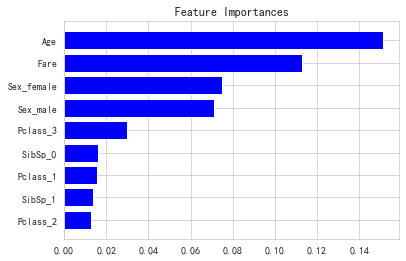

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

importances = model.feature_importances_

features = X_train.columns
indices = np.argsort(importances[0:9])  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

# model.estimators_[5]

In [57]:
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last_expr"  #all 输出太多了

## 比较 DT RF ET AB GB

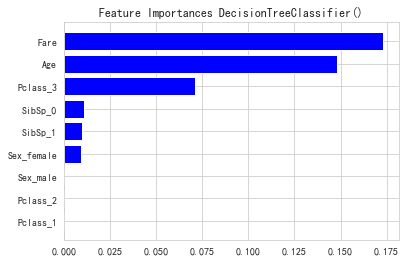

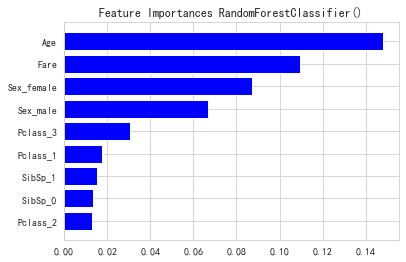

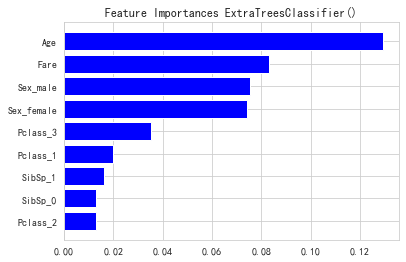

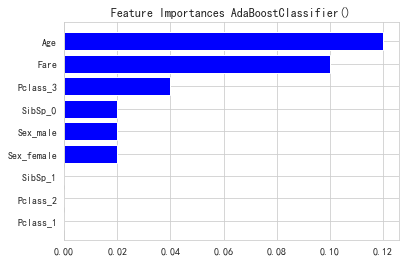

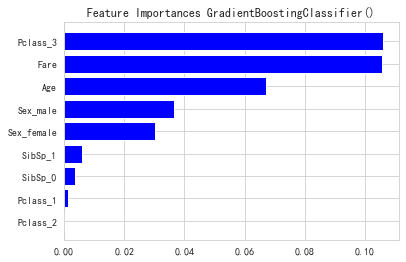

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier
from sklearn.svm import SVC

classifiers=[DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for classifier in classifiers:
    model = classifier
    model.fit(X_train,y_train)
    
    importances = model.feature_importances_
    
    features = X_train.columns
    indices = np.argsort(importances[0:9])  # top 10 features
    plt.title('Feature Importances '+str(classifier))
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.show()

可以看到

大部分模型是Age Fare最重要

GradientBoostingClassifier的重要性排序跟其它几个不太一样，最重要的是Pcalss_3和Fare

# 6 关联规则分析

## （1）加载工具库、进一步处理特征 
从 mlxtend 工具库中载入关联规则分析所需的 apriori()、association_rules()等方法；
下载安装并载入运行 FP-growth 算法所需的工具库 fpgrowth_py；
根据此前的分析，进一步对特征进行分箱处理（Binning），例如将年龄划分为 4 岁以下（Infant）、4 到 10 岁（Child）、10 到 19 岁（Teenager）、20 到 40 岁（Young Adult）等等，从而将数值型特征转化为分类特征；使用柱形图查看训练集和测试集上的特征分布；
使用 mlxtend 工具库中的 TransactionEncoder 类对各个分类特征进行编码。 

TransactionEncoder类似于独热编码，每个值转换为一个唯一的bool值

由于需要 求关联规则 ，必须要离散化/分箱连续变量了

连续变量: Fare Age

因为要查看与 Survived 的关系，所以仅取train

### pickle

In [6]:
#存储模型object到file
import pickle
def save_variable(v, filename):
    f = open(filename, 'wb')
    pickle.dump(v, f)
    f.close()
    return filename

def load_variavle(filename):
    f = open(filename, 'rb')
    r = pickle.load(f)
    f.close()
    return r

In [12]:
save_variable(df_append_fillna,'df_append_fillna.txtb')

'df_append_fillna.txtb'

### 取 df_train_fillna

In [73]:
df_append_fillna = load_variavle('df_append_fillna.txtb')

train_len = df_train.shape[0]
df_train_fillna = df_append_fillna[:train_len]

for column in df_train_fillna.columns:
    # df_train[column].drop_duplicates()
    print('------------------------')
    column
    # print(df_train[column].unique())
    df_train_fillna[column].drop_duplicates().shape[0]

------------------------


'PassengerId'

891

------------------------


'Survived'

2

------------------------


'Pclass'

3

------------------------


'Name'

891

------------------------


'Sex'

2

------------------------


'Age'

170

------------------------


'SibSp'

7

------------------------


'Parch'

7

------------------------


'Ticket'

681

------------------------


'Fare'

248

------------------------


'Cabin'

148

------------------------


'Embarked'

3

------------------------


'Name_Title'

7

------------------------


'Ticket_Letter'

195

------------------------


'Cabin_Letter'

9

### drop PassengerId Name Ticket Cabin + Ticket_Letter

In [76]:
drop_columns(df_train_fillna,['PassengerId', 'Name', 'Ticket', 'Cabin'])
drop_columns(df_train_fillna,['Ticket_Letter'])# 195个distinct值，数量太多

df_train_fillna.isnull().sum()#查看缺失值个数

C:\Users\rui\AppData\Local\Temp/ipykernel_24956/1603070237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(var_drop, axis=1, inplace=True)
C:\Users\rui\AppData\Local\Temp/ipykernel_24956/1603070237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(var_drop, axis=1, inplace=True)


Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Name_Title      0
Cabin_Letter    0
dtype: int64

### qcut Age Fare

In [ ]:
# pd.qcut(df_train_fillna['Fare'], 5)

In [53]:
# df_train_fillna_qcut = df_append_fillna.copy()
# df_train_fillna_qcut['Fare_qcut'] = pd.qcut(df_train_fillna['Fare'], 5)  #把数据由小到大分成5组，并且让每组数据的数量相同
# df_train_fillna_qcut['Fare_qcut'].value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare_qcut, dtype: int64

#### 定义函数

In [77]:
def convert_qcut(df,column_list):
    df_train_fillna_qcut = df.copy()
    for column in column_list:
        
        df_train_fillna_qcut[column+'_qcut'] = pd.qcut(df_train_fillna[column], 8)  #把数据由小到大分成5组，并且让每组数据的数量相同
        df_train_fillna_qcut.drop(column, axis=1, inplace=True)
    return df_train_fillna_qcut


df_train_fillna_qcut = convert_qcut(df_train_fillna,['Age','Fare'])

df_train_fillna_qcut['Age_qcut'].value_counts()
df_train_fillna_qcut['Fare_qcut'].value_counts()

(21.0, 25.0]      123
(28.0, 32.0]      118
(0.419, 16.0]     114
(16.0, 21.0]      114
(45.478, 80.0]    112
(37.0, 45.478]    109
(32.0, 37.0]      105
(25.0, 28.0]       96
Name: Age_qcut, dtype: int64

(-0.001, 7.75]       140
(9.841, 14.454]      113
(24.479, 31.0]       112
(69.488, 512.329]    112
(7.91, 9.841]        111
(14.454, 24.479]     110
(31.0, 69.488]       110
(7.75, 7.91]          83
Name: Fare_qcut, dtype: int64

#### astype(str)

In [78]:
df_train_fillna_qcut["Survived"]=df_train_fillna_qcut["Survived"].astype(int)#否则是0.0 1.0
# # NameError: name 'int64' is not defined
df_train_fillna_qcut=df_train_fillna_qcut.astype(str)

#### 可视化

In [95]:

# df_train_fillna_qcut["Age_qcut"]=df_train_fillna_qcut["Age_qcut"].astype(str)
# 
# df_train_fillna_qcut["Fare_qcut"]=df_train_fillna_qcut["Fare_qcut"].astype(str)

<Figure size 936x360 with 0 Axes>

<AxesSubplot:xlabel='Age_qcut', ylabel='Count'>

<Figure size 936x360 with 0 Axes>

<AxesSubplot:xlabel='Fare_qcut', ylabel='Count'>

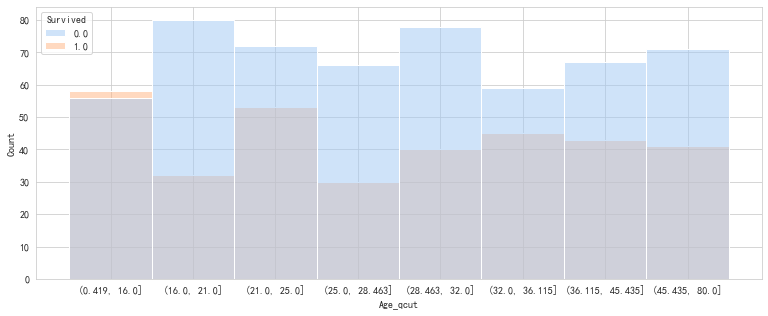

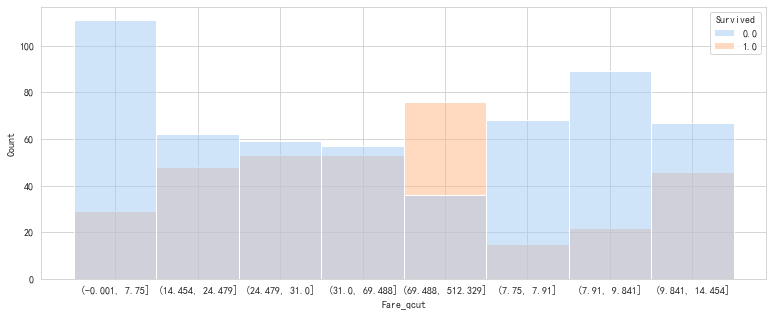

In [79]:
# sns.histplot(data=df_train.sort_values('Cabin_Letter'), x="Cabin_Letter", hue="Survived", palette='pastel')#太浅

plt.figure(figsize = (13,5))
column_x='Age_qcut'
sns.histplot(data=df_train_fillna_qcut.sort_values(column_x), x=column_x, hue="Survived", palette='pastel')#太浅

plt.figure(figsize = (13,5))
column_x='Fare_qcut'
sns.histplot(data=df_train_fillna_qcut.sort_values(column_x), x=column_x, hue="Survived", palette='pastel')#太浅


# TypeError: Invalid object type at position 0
# 应该是x dtype category 不行

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Age_qcut', ylabel='Count'>

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Fare_qcut', ylabel='Count'>

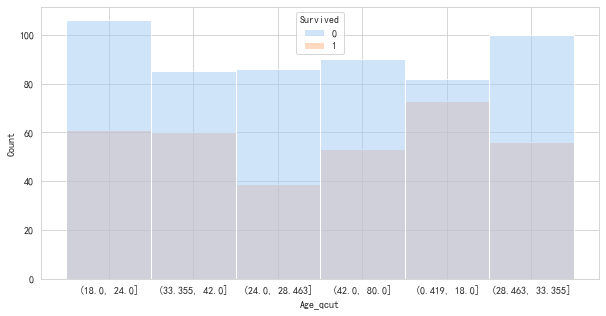

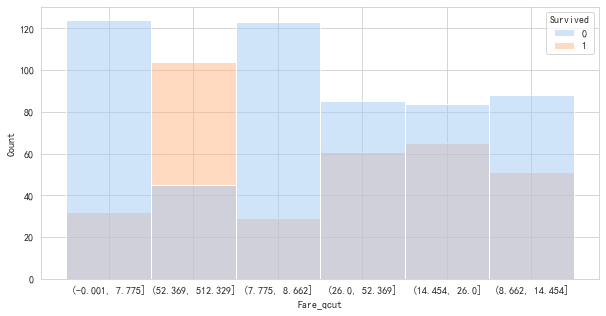

In [73]:
# 分6段看不出来特征

### replace Survived

In [85]:
str(df_train_fillna_qcut.values[4,2])

'male'

In [ ]:
# rep = {0: "Dead", 1: "Survived"}
# df_train_fillna_qcut.replace({'Survived' : rep}, inplace=True)

### TransactionEncoder

TransactionEncoder 没法加前缀，多列的相同值会重叠；还是用get_dummies比较好


需要转成嵌套list，直接传入dataframe的话

te.columns_ 为 ['S', 'd', 'e', 'i', 'r', 'u', 'v']


TypeError: '<' not supported between instances of 'str' and 'int'

float和int要转成str

In [100]:
from mlxtend.preprocessing import TransactionEncoder


def te_encode(df):
    df_list = np.array(df).tolist()
    # print(df_list)
    
    te = TransactionEncoder()
    te_ary = te.fit(df_list).transform(df_list)
    print(te.columns_)
    df_train_fillna_qcut_encode = pd.DataFrame(te_ary, columns=te.columns_)
    return df_train_fillna_qcut_encode


df_train_fillna_qcut_encode = te_encode(df_train_fillna_qcut)

df_train_fillna_qcut_encode.head()
'''
会输出
'''

['(-0.001, 7.75]', '(0.419, 16.0]', '(14.454, 24.479]', '(16.0, 21.0]', '(21.0, 25.0]', '(24.479, 31.0]', '(25.0, 28.463]', '(28.463, 32.0]', '(31.0, 69.488]', '(32.0, 36.115]', '(36.115, 45.435]', '(45.435, 80.0]', '(69.488, 512.329]', '(7.75, 7.91]', '(7.91, 9.841]', '(9.841, 14.454]', '0', '1', '2', '3', '4', '5', '6', '8', 'A', 'B', 'C', 'D', 'Dr', 'E', 'F', 'G', 'Master', 'Miss', 'Mr', 'Mrs', 'Q', 'Rare', 'Rev', 'S', 'T', 'female', 'male', 'nan']


,"(-0.001, 7.75]","(0.419, 16.0]","(14.454, 24.479]","(16.0, 21.0]","(21.0, 25.0]","(24.479, 31.0]","(25.0, 28.463]","(28.463, 32.0]","(31.0, 69.488]","(32.0, 36.115]",...,Mr,Mrs,Q,Rare,Rev,S,T,female,male,nan
0,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
3,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,True,True


'\n会输出\n'

### get_dummies

In [27]:
df_train_fillna_qcut_encode=pd.get_dummies(df_train_fillna_qcut)
df_train_fillna_qcut_encode.head()

,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,"Age_qcut_(37.0, 45.478]","Age_qcut_(45.478, 80.0]","Fare_qcut_(-0.001, 7.75]","Fare_qcut_(14.454, 24.479]","Fare_qcut_(24.479, 31.0]","Fare_qcut_(31.0, 69.488]","Fare_qcut_(69.488, 512.329]","Fare_qcut_(7.75, 7.91]","Fare_qcut_(7.91, 9.841]","Fare_qcut_(9.841, 14.454]"
0,1,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


右边 变量有时候不可用，多运行几个，可能就可用了

## （2）特征分析

使用关联规则可视化工具 arulesViz 分析特征，获得与幸存关联性较高的特征；使用 DataFrame 类的 groupby()方法分析成对儿特征间的关联，如分析登船港口和客舱等级可以发现，登船港口为法国港口 Charbourg 的乘客的客舱等级有更大概率为头等舱。 


arulesViz

用于 Visualizing Association Rules and Frequent Itemsets

使用关联规则和项集的各种可视化技术扩展包“arules”。该软件包还包括几个用于规则探索的交互式可视化。



需要

jupyter nbextension install --py widgetsnbextension --user

jupyter nbextension enable widgetsnbextension --user --py

否则运行出来不显示

In [ ]:
from arulesviz import Arulesviz

transactions = []
to_drop = set() #set(['other vegetables', 'whole milk', 'yogurt', 'root vegetables', 'fruit/vegetable juice'])
with open('./df_train_fillna_qcut_apply.csv') as f:
    for row in f:
        q = set(row.strip().split('@')) - to_drop
        if len(q) > 1:
            transactions.append(q)
transactions# list 7676行， 每行是个set
# 这个输出太长

In [87]:
g = Arulesviz(transactions, 0.3, 0.3, 12, products_to_drop=['other vegetables', 'whole milk',
                                                              'yogurt', 'root vegetables',
                                                              'fruit/vegetable juice'])

g.create_rules()
g.plot_graph(width=1800, directed=False, charge=-150, link_distance=20)

## （3）建立关联规则分析模型 
根据处理好的特征生成频繁项集，并计算支持度；设定最小支持度，使用 apriori 算法扫描频繁项集，挖掘关联规则；利用 fpgrowth_py 完成关联规则分析，创建 FP 树，并通过 FP 树挖掘频繁项集。 

### mlxtend

#### apriori

antecedents 先导项

consequents 后继项


support 支持度

confidence 可信度/置信度

lift 提升度



leverage 杠杆率

conviction 确信度，与提升度类似，但用差值表示。

这两个用得比较少，和置信度、提升度也有些类似

In [109]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_train_fillna_qcut_encode, min_support=0.3, use_colnames=True)
#frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.616162,(Survived_0)
1,0.383838,(Survived_1)
2,0.551066,(Pclass_3)
3,0.352413,(Sex_female)
4,0.647587,(Sex_male)
...,...,...
152,0.345679,"(Embarked_S, Sex_male, Name_Title_Mr, Cabin_Le..."
153,0.304153,"(Embarked_S, SibSp_0, Cabin_Letter_nan, Name_T..."
154,0.336700,"(SibSp_0, Sex_male, Cabin_Letter_nan, Name_Tit..."
155,0.305275,"(Embarked_S, Sex_male, Cabin_Letter_nan, Name_..."


#### association_rules

In [120]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 73c68257545b5f8530b7044f56647bd2db92e2ba
python           : 3.9.0.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : Chinese (Simplified)_China.936

pandas           : 1.3.3
numpy            : 1.21.2
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.1.2
setuptools       : 62.1.0
Cython           : 0.29.24
pytest           : None
hypothesis       : None
sphinx           : 4.2.0
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.6.3
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.0.3
IPython          : 7.28.0
pandas_datareader: None
bs4              : 4.11.1
bottlen

In [111]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sex_male),(Survived_0),0.647587,0.616162,0.525253,0.811092,1.316362,0.126234,2.031878
1,(Survived_0),(Sex_male),0.616162,0.647587,0.525253,0.852459,1.316362,0.126234,2.388577
2,(Survived_0),(Parch_0),0.616162,0.760943,0.499439,0.810565,1.065211,0.030575,1.261946
3,(Name_Title_Mr),(Survived_0),0.580247,0.616162,0.489338,0.843327,1.368678,0.131812,2.449931
4,(Survived_0),(Cabin_Letter_nan),0.616162,0.771044,0.539843,0.876138,1.136302,0.064755,1.848485
...,...,...,...,...,...,...,...,...,...
494,"(Embarked_S, Cabin_Letter_nan, Sex_male, Parch_0)","(Name_Title_Mr, SibSp_0)",0.355780,0.463524,0.304153,0.854890,1.844326,0.139240,3.697018
495,"(Embarked_S, Name_Title_Mr, Cabin_Letter_nan, ...","(Sex_male, SibSp_0)",0.345679,0.487093,0.304153,0.879870,1.806369,0.135775,4.269603
496,"(Embarked_S, SibSp_0, Sex_male)","(Cabin_Letter_nan, Name_Title_Mr, Parch_0)",0.373737,0.438833,0.304153,0.813814,1.854496,0.140144,3.014011
497,"(Name_Title_Mr, Embarked_S, SibSp_0)","(Sex_male, Cabin_Letter_nan, Parch_0)",0.358025,0.453423,0.304153,0.849530,1.873592,0.141816,3.632459


In [53]:
df_train_fillna_qcut_encode

,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,"Age_qcut_(37.0, 45.478]","Age_qcut_(45.478, 80.0]","Fare_qcut_(-0.001, 7.75]","Fare_qcut_(14.454, 24.479]","Fare_qcut_(24.479, 31.0]","Fare_qcut_(31.0, 69.488]","Fare_qcut_(69.488, 512.329]","Fare_qcut_(7.75, 7.91]","Fare_qcut_(7.91, 9.841]","Fare_qcut_(9.841, 14.454]"
0,1,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
887,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
888,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
889,0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
pd.from_dummies(df_train_fillna_qcut_encode,sep='_')

# ValueError: Dummy DataFrame contains multi-assignment(s); First instance in row: 0
# 加上sep='_'就好了

# 这个必须得分割，不太好

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Name,Cabin,Age,Fare
0,0,3,male,1,0,S,Title_Mr,Letter_nan,"qcut_(21.0, 25.0]","qcut_(-0.001, 7.75]"
1,1,1,female,1,0,C,Title_Mrs,Letter_C,"qcut_(37.0, 45.478]","qcut_(69.488, 512.329]"
2,1,3,female,0,0,S,Title_Miss,Letter_nan,"qcut_(25.0, 28.0]","qcut_(7.91, 9.841]"
3,1,1,female,1,0,S,Title_Mrs,Letter_C,"qcut_(32.0, 37.0]","qcut_(31.0, 69.488]"
4,0,3,male,0,0,S,Title_Mr,Letter_nan,"qcut_(32.0, 37.0]","qcut_(7.91, 9.841]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,Title_Rev,Letter_nan,"qcut_(25.0, 28.0]","qcut_(9.841, 14.454]"
887,1,1,female,0,0,S,Title_Miss,Letter_B,"qcut_(16.0, 21.0]","qcut_(24.479, 31.0]"
888,0,3,female,1,2,S,Title_Miss,Letter_nan,"qcut_(16.0, 21.0]","qcut_(14.454, 24.479]"
889,1,1,male,0,0,C,Title_Mr,Letter_C,"qcut_(25.0, 28.0]","qcut_(24.479, 31.0]"


### add column name

In [51]:
df_train_fillna_qcut_encode
# temp=df_train_fillna_qcut_encode.astype('bool')

df_train_fillna_qcut_encode.mask(df_train_fillna_qcut_encode.astype(bool), df_train_fillna_qcut_encode.columns.to_series(), axis=1)

,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,"Age_qcut_(37.0, 45.478]","Age_qcut_(45.478, 80.0]","Fare_qcut_(-0.001, 7.75]","Fare_qcut_(14.454, 24.479]","Fare_qcut_(24.479, 31.0]","Fare_qcut_(31.0, 69.488]","Fare_qcut_(69.488, 512.329]","Fare_qcut_(7.75, 7.91]","Fare_qcut_(7.91, 9.841]","Fare_qcut_(9.841, 14.454]"
0,1,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
887,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
888,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
889,0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,"Age_qcut_(37.0, 45.478]","Age_qcut_(45.478, 80.0]","Fare_qcut_(-0.001, 7.75]","Fare_qcut_(14.454, 24.479]","Fare_qcut_(24.479, 31.0]","Fare_qcut_(31.0, 69.488]","Fare_qcut_(69.488, 512.329]","Fare_qcut_(7.75, 7.91]","Fare_qcut_(7.91, 9.841]","Fare_qcut_(9.841, 14.454]"
0,Survived_0,0,0,0,Pclass_3,0,Sex_male,0,SibSp_1,0,...,0,0,"Fare_qcut_(-0.001, 7.75]",0,0,0,0,0,0,0
1,0,Survived_1,Pclass_1,0,0,Sex_female,0,0,SibSp_1,0,...,"Age_qcut_(37.0, 45.478]",0,0,0,0,0,"Fare_qcut_(69.488, 512.329]",0,0,0
2,0,Survived_1,0,0,Pclass_3,Sex_female,0,SibSp_0,0,0,...,0,0,0,0,0,0,0,0,"Fare_qcut_(7.91, 9.841]",0
3,0,Survived_1,Pclass_1,0,0,Sex_female,0,0,SibSp_1,0,...,0,0,0,0,0,"Fare_qcut_(31.0, 69.488]",0,0,0,0
4,Survived_0,0,0,0,Pclass_3,0,Sex_male,SibSp_0,0,0,...,0,0,0,0,0,0,0,0,"Fare_qcut_(7.91, 9.841]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Survived_0,0,0,Pclass_2,0,0,Sex_male,SibSp_0,0,0,...,0,0,0,0,0,0,0,0,0,"Fare_qcut_(9.841, 14.454]"
887,0,Survived_1,Pclass_1,0,0,Sex_female,0,SibSp_0,0,0,...,0,0,0,0,"Fare_qcut_(24.479, 31.0]",0,0,0,0,0
888,Survived_0,0,0,0,Pclass_3,Sex_female,0,0,SibSp_1,0,...,0,0,0,"Fare_qcut_(14.454, 24.479]",0,0,0,0,0,0
889,0,Survived_1,Pclass_1,0,0,0,Sex_male,SibSp_0,0,0,...,0,0,0,0,"Fare_qcut_(24.479, 31.0]",0,0,0,0,0


In [56]:
temp.shape
temp.columns.shape

(891, 56)

(56,)

In [48]:
temp.mask(temp, temp.columns.to_series(), axis=1)

# ValueError: Boolean array expected for the condition, not uint8

ValueError: other must be the same shape as self when an ndarray

In [29]:
df_train_fillna_qcut_encode.astype(int).where(~df_train_fillna_qcut_encode, df_train_fillna_qcut_encode.columns.to_series(), axis=1)

ValueError: Boolean array expected for the condition, not uint8

#### apply

In [79]:
df_train_fillna_qcut_apply=df_train_fillna_qcut.astype(str).apply(lambda x : x.name+'_'+x)
df_train_fillna_qcut_apply

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Name_Title,Cabin_Letter,Age_qcut,Fare_qcut
0,Survived_0,Pclass_3,Sex_male,SibSp_1,Parch_0,Embarked_S,Name_Title_Mr,Cabin_Letter_nan,"Age_qcut_(21.0, 25.0]","Fare_qcut_(-0.001, 7.75]"
1,Survived_1,Pclass_1,Sex_female,SibSp_1,Parch_0,Embarked_C,Name_Title_Mrs,Cabin_Letter_C,"Age_qcut_(37.0, 45.478]","Fare_qcut_(69.488, 512.329]"
2,Survived_1,Pclass_3,Sex_female,SibSp_0,Parch_0,Embarked_S,Name_Title_Miss,Cabin_Letter_nan,"Age_qcut_(25.0, 28.0]","Fare_qcut_(7.91, 9.841]"
3,Survived_1,Pclass_1,Sex_female,SibSp_1,Parch_0,Embarked_S,Name_Title_Mrs,Cabin_Letter_C,"Age_qcut_(32.0, 37.0]","Fare_qcut_(31.0, 69.488]"
4,Survived_0,Pclass_3,Sex_male,SibSp_0,Parch_0,Embarked_S,Name_Title_Mr,Cabin_Letter_nan,"Age_qcut_(32.0, 37.0]","Fare_qcut_(7.91, 9.841]"
...,...,...,...,...,...,...,...,...,...,...
886,Survived_0,Pclass_2,Sex_male,SibSp_0,Parch_0,Embarked_S,Name_Title_Rev,Cabin_Letter_nan,"Age_qcut_(25.0, 28.0]","Fare_qcut_(9.841, 14.454]"
887,Survived_1,Pclass_1,Sex_female,SibSp_0,Parch_0,Embarked_S,Name_Title_Miss,Cabin_Letter_B,"Age_qcut_(16.0, 21.0]","Fare_qcut_(24.479, 31.0]"
888,Survived_0,Pclass_3,Sex_female,SibSp_1,Parch_2,Embarked_S,Name_Title_Miss,Cabin_Letter_nan,"Age_qcut_(16.0, 21.0]","Fare_qcut_(14.454, 24.479]"
889,Survived_1,Pclass_1,Sex_male,SibSp_0,Parch_0,Embarked_C,Name_Title_Mr,Cabin_Letter_C,"Age_qcut_(25.0, 28.0]","Fare_qcut_(24.479, 31.0]"


In [82]:
df_train_fillna_qcut_apply.to_csv('df_train_fillna_qcut_apply.csv',header=0,index=0,sep='@')#需要修改分隔符

In [ ]:
np.array(df_train_fillna_qcut_apply).tolist()

### fpgrowth_py

In [21]:
from fpgrowth_py import fpgrowth
# itemSetList = [['eggs', 'bacon', 'soup'],
#                ['eggs', 'bacon', 'apple'],
#                ['soup', 'bacon', 'banana']]
freqItemSet, rules = fpgrowth(np.array(df_train_fillna_qcut_apply).tolist(), minSupRatio=0.5, minConf=0.5)
freqItemSet
print('------------------------')
rules

# TypeError: cannot unpack non-iterable NoneType object

[{'Pclass_3'},
 {'Cabin_Letter_nan', 'Pclass_3'},
 {'Name_Title_Mr'},
 {'Name_Title_Mr', 'Parch_0'},
 {'Name_Title_Mr', 'Parch_0', 'Sex_male'},
 {'Name_Title_Mr', 'Sex_male'},
 {'Survived_0'},
 {'Sex_male', 'Survived_0'},
 {'Cabin_Letter_nan', 'Survived_0'},
 {'Sex_male'},
 {'Cabin_Letter_nan', 'Sex_male'},
 {'Parch_0', 'Sex_male'},
 {'SibSp_0'},
 {'Cabin_Letter_nan', 'SibSp_0'},
 {'Parch_0', 'SibSp_0'},
 {'Embarked_S'},
 {'Embarked_S', 'Parch_0'},
 {'Cabin_Letter_nan', 'Embarked_S'},
 {'Parch_0'},
 {'Cabin_Letter_nan', 'Parch_0'},
 {'Cabin_Letter_nan'}]

------------------------


[[{'Pclass_3'}, {'Cabin_Letter_nan'}, 0.9755600814663951],
 [{'Cabin_Letter_nan'}, {'Pclass_3'}, 0.6972343522561864],
 [{'Name_Title_Mr'}, {'Parch_0'}, 0.8994197292069632],
 [{'Parch_0'}, {'Name_Title_Mr'}, 0.6858407079646017],
 [{'Name_Title_Mr'}, {'Parch_0', 'Sex_male'}, 0.8994197292069632],
 [{'Parch_0'}, {'Name_Title_Mr', 'Sex_male'}, 0.6858407079646017],
 [{'Sex_male'}, {'Name_Title_Mr', 'Parch_0'}, 0.8058925476603119],
 [{'Name_Title_Mr', 'Parch_0'}, {'Sex_male'}, 1.0],
 [{'Name_Title_Mr', 'Sex_male'}, {'Parch_0'}, 0.8994197292069632],
 [{'Parch_0', 'Sex_male'}, {'Name_Title_Mr'}, 0.9607438016528925],
 [{'Name_Title_Mr'}, {'Sex_male'}, 1.0],
 [{'Sex_male'}, {'Name_Title_Mr'}, 0.8960138648180243],
 [{'Survived_0'}, {'Sex_male'}, 0.8524590163934426],
 [{'Sex_male'}, {'Survived_0'}, 0.8110918544194108],
 [{'Survived_0'}, {'Cabin_Letter_nan'}, 0.8761384335154827],
 [{'Cabin_Letter_nan'}, {'Survived_0'}, 0.7001455604075691],
 [{'Sex_male'}, {'Cabin_Letter_nan'}, 0.8145580589254766],
 

# 7 预测和进行模型评价 

载入 sklearn 工具库，使用 train_test_split()方法将特征集合重新划分为训练集和测试集；
编写代码分别建立决策树、朴素贝叶斯、神经网络、支持向量机、随机森林及 K 近邻模；
训练模型，使用 accuracy_score()、f1_score()方法产生准确性、F1 值等评价指标；
使用 confusion_matrix()、roc_curve()、roc_auc_score()等方法获得模型混淆矩阵和 ROC 曲线；
比较不同模型的训练速度、预测结果，分析模型的优缺点。 

## train_test_split

In [11]:
from sklearn.model_selection import train_test_split

X,y = split_X_y(df_train_fillna_dummies)

X_train, X_test, y_train, y_test = train_test_split(X, y)# If ``train_size`` is also None, it will be set to 0.25.


X_train
X_test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Ticket_Letter_WEP,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_C,Cabin_Letter_D,Cabin_Letter_E,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_T,Cabin_Letter_nan
159,13.700087,69.5500,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
503,37.000000,9.5875,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
801,31.000000,26.2500,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
255,29.000000,15.2458,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
796,49.000000,25.9292,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,21.000000,9.8250,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
810,26.000000,7.8875,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,25.000000,26.0000,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
127,24.000000,7.1417,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Ticket_Letter_WEP,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_C,Cabin_Letter_D,Cabin_Letter_E,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_T,Cabin_Letter_nan
382,32.000000,7.9250,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
633,41.300837,0.0000,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
514,24.000000,7.4958,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
751,6.000000,12.4750,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
753,23.000000,7.8958,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,29.423791,8.0500,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
369,24.000000,69.3000,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
846,13.700087,69.5500,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
422,29.000000,7.8750,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## 决策树、朴素贝叶斯、神经网络、支持向量机、随机森林及 K 近邻

### cross_val_score()

In [28]:

import time
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


classifiers=[
    DecisionTreeClassifier(),
    GaussianNB(),
    MLPClassifier(max_iter=200),  #1000时间太长太长
    SVC(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]

scoring_list=['accuracy','f1','roc_auc']
df_scores = pd.DataFrame(columns=('name', 'accuracy', 'f1', 'roc_auc', 'time'))

for classifier in classifiers:
    row_list=[]
    row_list.append(str(classifier))
    
    model = classifier

    start_time = time.time()
    for scoring in scoring_list:
        row_list.append(cross_val_score(model, X, y, cv=4, scoring=scoring).mean())
    end_time = time.time()
    row_list.append(end_time - start_time)

    #
    df_scores.loc[len(df_scores)] = row_list



C:\Users\rui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

In [29]:
df_scores# 第2次

,name,accuracy,f1,roc_auc,time
0,DecisionTreeClassifier(),0.792374,0.727061,0.792954,0.508030
1,GaussianNB(),0.463605,0.566163,0.563074,2.007190
2,MLPClassifier(),0.815972,0.748100,0.859124,46.286870
3,SVC(),0.661087,0.379251,0.757660,2.564060
4,RandomForestClassifier(),0.832793,0.755576,0.878130,7.106725
5,KNeighborsClassifier(),0.703758,0.572780,0.729115,0.585288


In [16]:
df_scores# 第1次

,name,accuracy,f1,roc_auc,time
0,DecisionTreeClassifier(),0.796853,0.724028,0.787401,0.824561
1,GaussianNB(),0.463605,0.566163,0.563074,1.823575
2,MLPClassifier(),0.815982,0.759840,0.863199,63.218596
3,SVC(),0.661087,0.379251,0.757660,1.987185
4,RandomForestClassifier(),0.824920,0.758343,0.881036,4.499774
5,KNeighborsClassifier(),0.703758,0.572780,0.729115,0.531148


<AxesSubplot:title={'center':'score'}, xlabel='name'>

<AxesSubplot:title={'center':'time'}, xlabel='name'>

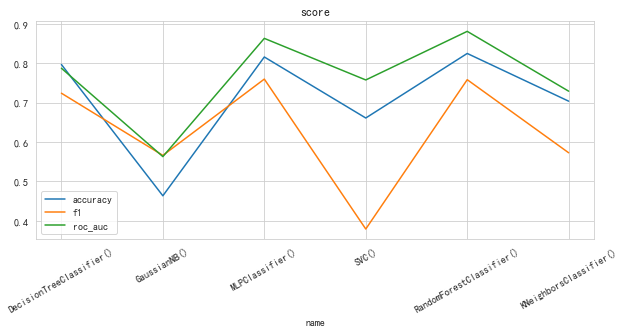

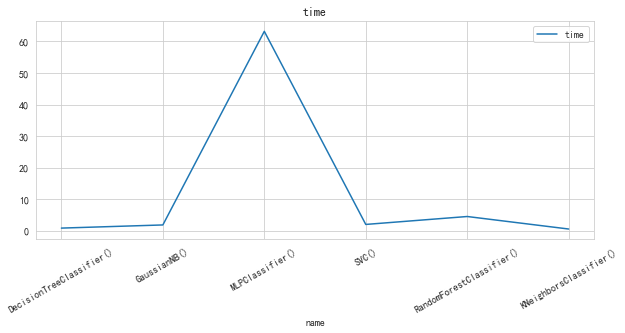

In [20]:
df_scores.plot(x='name',y=['accuracy', 'f1', 'roc_auc'], rot=30, figsize=(10, 4),title='score')  #默认以index为x轴
df_scores.plot(x='name', y=['time'], rot=30, figsize=(10, 4),title='time')  #默认以index为x轴

可以看到随机森林和神经网络的效果最好，但是神经网络太慢了（这个第一次运行的时间更慢）

### accuracy_score() f1_score() roc_auc_score() 单独计算

不使用cross_val_score()

In [35]:

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import time
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


def score_to_df(X_train,X_test,y_train,y_test):
    classifiers = [
        DecisionTreeClassifier(),
        GaussianNB(),
        MLPClassifier(max_iter=200),  #1000时间太长太长
        SVC(),
        RandomForestClassifier(),
        KNeighborsClassifier()
    ]
    
    scoring_list = ['accuracy', 'f1', 'roc_auc']
    df_scores = pd.DataFrame(columns=('name', 'accuracy', 'f1', 'roc_auc', 'time'))
    
    
    for classifier in classifiers:
        row_list = []
        row_list.append(str(classifier))

        model = classifier

        start_time = time.time()
        #
        model.probability = True
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        y_predict_proba = model.predict_proba(X_test)
        #

        
        #
        row_list.append(accuracy_score(y_test, y_predict))
        row_list.append(f1_score(y_test, y_predict))
        row_list.append(roc_auc_score(y_test, y_predict_proba[:,1]))
        #
        end_time = time.time()
        row_list.append(end_time - start_time)

        #
        df_scores.loc[len(df_scores)] = row_list
        
    return df_scores


df_scores_separate = score_to_df(X,X,y,y)

# ValueError: y should be a 1d array, got an array of shape (891, 2) instead.
# [:,1]需要只取第2列

# AttributeError: predict_proba is not available when  probability=False

In [32]:
df_scores_separate

,name,accuracy,f1,roc_auc,time
0,DecisionTreeClassifier(),0.994388,0.992658,0.999915,0.168309
1,GaussianNB(),0.564534,0.637383,0.664147,0.129654
2,MLPClassifier(),0.931538,0.909091,0.975277,5.223807
3,SVC(),0.685746,0.428571,0.780491,0.946330
4,RandomForestClassifier(),0.994388,0.992658,0.999361,0.440555
5,KNeighborsClassifier(),0.819304,0.753446,0.898119,0.101733


<AxesSubplot:title={'center':'score'}, xlabel='name'>

<AxesSubplot:title={'center':'time'}, xlabel='name'>

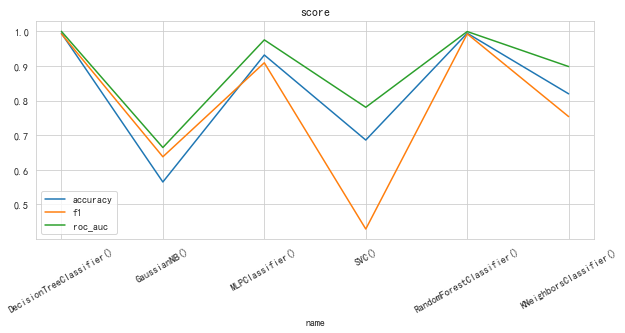

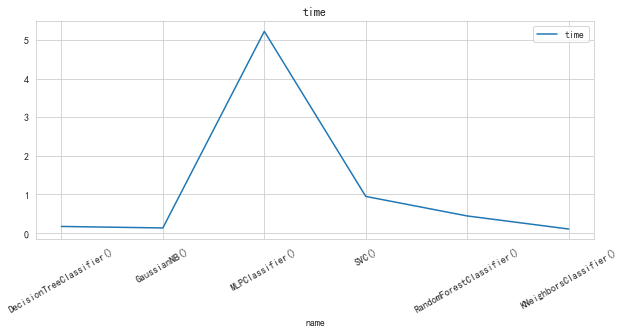

In [33]:
df_scores_separate.plot(x='name',y=['accuracy', 'f1', 'roc_auc'], rot=30, figsize=(10, 4),title='score')  #默认以index为x轴
df_scores_separate.plot(x='name', y=['time'], rot=30, figsize=(10, 4),title='time')  #默认以index为x轴

不使用交叉验证、分割train test的话，是决策树和随机森林分数最高

还是神经网络最慢

In [36]:
df_scores_separate_trte = score_to_df(X_train,X_test,y_train,y_test)

C:\Users\rui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
df_scores_separate_trte

,name,accuracy,f1,roc_auc,time
0,DecisionTreeClassifier(),0.829596,0.784091,0.822069,0.066820
1,GaussianNB(),0.470852,0.566176,0.537062,0.047874
2,MLPClassifier(),0.825112,0.771930,0.882903,7.704486
3,SVC(),0.690583,0.448000,0.828316,0.885782
4,RandomForestClassifier(),0.843049,0.795322,0.897116,0.732904
5,KNeighborsClassifier(),0.735426,0.642424,0.794189,0.071198


<AxesSubplot:title={'center':'score'}, xlabel='name'>

<AxesSubplot:title={'center':'time'}, xlabel='name'>

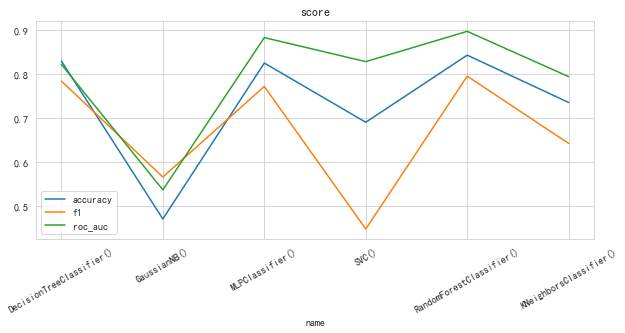

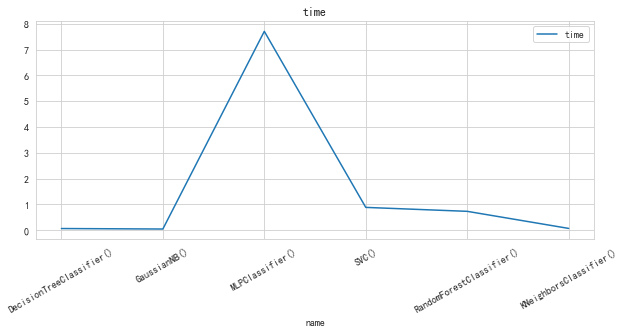

In [38]:
df_scores_separate_trte.plot(x='name',y=['accuracy', 'f1', 'roc_auc'], rot=30, figsize=(10, 4),title='score')  #默认以index为x轴
df_scores_separate_trte.plot(x='name', y=['time'], rot=30, figsize=(10, 4),title='time')  #默认以index为x轴

随机森林分数最高

决策树和神经网络并列第2

## 使用 RandomForestClassifier

## confusion_matrix()

绘制： heatmap 和 imshow 都可以

In [57]:
from sklearn import metrics

def get_output(classifier,X_train,X_test,y_train,y_test,which='y_predict'):
    model = classifier
    start_time = time.time()
    #
    model.probability = True
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    y_predict_proba = model.predict_proba(X_test)
    if which == 'y_predict':
        return y_predict
    if which == 'y_predict_proba':
        return y_predict_proba
    
    

### 可视化

混淆矩阵
 [[121  13]
 [ 21  68]]


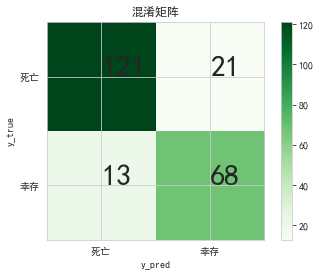

In [56]:
InteractiveShell.ast_node_interactivity = "last_expr"  #all 输出太多了


def plot_matrix(matrix, classes):
    # 绘制热度图，后面是指定的颜色块，gray也可以，gray_x反色也可以
    plt.figure()#figsize=(6, 6)
    plt.imshow(matrix, cmap=plt.cm.Greens)#矩阵每个值作为一个块
    indices = range(len(matrix))
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    plt.colorbar()#右侧颜色条
    plt.xlabel('y_pred')
    plt.ylabel('y_true')
    plt.title('混淆矩阵')
    # 显示数据
    for first_index in range(len(matrix)):
        for second_index in range(len(matrix[first_index])):
            plt.text(first_index, second_index, matrix[first_index][second_index], fontsize=30)
    # 显示图片
    plt.show()

#混淆矩阵
con_mat = confusion_matrix(y_test, get_output(RandomForestClassifier(),X_train,X_test,y_train,y_test))
print("混淆矩阵\n", con_mat)

classes=['死亡','幸存']
plot_matrix(con_mat,classes)

## classification_report()

In [48]:
from sklearn.metrics import classification_report

res = classification_report(y_test, get_output(RandomForestClassifier(),X_train,X_test,y_train,y_test))
print(res)

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       134
         1.0       0.83      0.79      0.81        89

    accuracy                           0.85       223
   macro avg       0.85      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223



## roc_curve 可视化

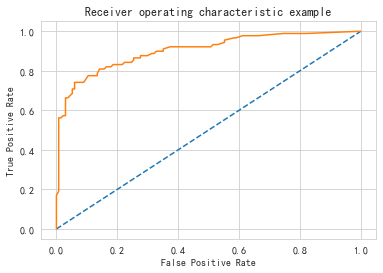

In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, get_output(RandomForestClassifier(),X_train,X_test,y_train,y_test,'y_predict_proba')[:,1])

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr)
plt.title('Receiver operating characteristic example')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


## Ensemble Learning集成学习

Two families of ensemble methods are usually distinguished:

### 1 averaging

In **averaging** methods, the driving principle is to build several estimators independently and then to average their predictions.

On average, the combined estimator is usually better than any of the single base estimator because its variance方差 is reduced.
Examples: Bagging methods, Forests of randomized trees, …



BaggingClassifier(**B**ootstrap **Ag**gregation)
VotingClassifier



### 比较Bagging和Voting

Bagging是多个**同一种**模型，这些模型分别使用训练集分成的子集

Voting是多个**不同种**的模型，这些模型都使用全部训练集


### 比较Bagging和RandomForest

RandomForest是为了减少variance，不过可能稍微增加bias

Bagging也是为了减少variance

RandomForestClassifier 就相当于 BaggingClassifier(estimator=DecisionTreeClassifier) 的优化版

### RandomForestClassifier
每棵树都基于一个通过**可放回抽样（bootstrap）**得到的训练集构建。

另外，在构建树的过程中，当split一个节点时，split的选择不再是对所有features的最佳选择。相反地，**在features的子集中**随机进行split反倒是最好的split方式。

这种随机的后果是，整个forest的bias通常会略微增大，但是由于结果会求平均，因此，它的variance会降低，会修正偏大的bias，从而得到一个更好的模型。


### ExtraTreesClassifier

Extremely Randomized Trees，意思是极度随机树。这是一种组合方法，与其说像决策树，实际上它更像随机森林。


与随机森林的相同点：

1.bootstrap了样本。

2.随机选取了部分特征，来构造一个棵树。我们知道随机森林是由很多个随机的决策树组成的，extratrees比随机森林更随机。

与随机森林的不同点：

每棵决策树选择划分点的方式不同。对于普通决策树，每个特征都是根据某个标准(信息增益或者gini不纯)去进行划分，比如说一个数值特征的取值范围是0到100，当我们把这个特征划分为0-45，45-100的时候，效果最佳（从信息增益或者gini不纯的角度），决策树就会将45作为划分点；然后再按照某个标准来选择特征。

而对于extra trees中的决策树，划分点的选择**更为随机**，比如一个数值特征的取值范围是0到100，我们随机选择一个0到100的数值作为划分点；然后再按照评判标准选择一个特征。

### 2 boosting

By contrast, in **boosting** methods, base estimators are built sequentially（有序的） and one tries to reduce the bias（偏差） of the combined estimator.

The motivation is to combine several weak models to produce a powerful ensemble.

Examples: AdaBoost（Adaptive Boosting）, Gradient（梯度） Tree Boosting, … 

AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier(eXtreme Gradient Boosting)

### 比较 AdaBoostClassifier 和 GradientBoostingClassifier

Gradient Boosting与Adaboosting方法的区别是：

每一次计算都是为了减少上一次计算的残差（利用残差学模型），为了消除残差，我们会在残差减少的梯度方向上创建一个新的模型。可以看出GB和Boosting都是不断堆加模型的方式，只不过

Boosting是为了减少误分样本的数量，

而GB的目的是为了减小残差值。



Gradient Boosting 方法理论上比 AdaBoost 表现更好。

但是，它更容易出现过度拟合问题，并且梯度提升的运行时间更长。

可以设置提前停止条件以减轻过度拟合并减少运行时间。


### 3 stacking


### 1 串行

依次修复上一个结果的错误

all boosting

### 2 并行

多个结果求平均

VotingClassifier
BaggingClassifier
RandomForestClassifier


### GradientBoostingClassifier

GradientBoosting 由 Gradient descent 和 Boosting 组成。

Gradient Boosting 算法比 AdaBoost 对异常值更健壮。

### 代码实现

第一层为 ExtraTreesClassifier AdaBoostClassifier RandomForestClassifier

第二层为 GradientBoostingClassifier

In [68]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


estimators = [('et', ExtraTreesClassifier()),
              ('ab', AdaBoostClassifier()),
              ('rf', RandomForestClassifier())]

final_estimator = GradientBoostingClassifier()
st_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator)



print_score(st_clf)

0.8385650224215246
0.7957823294146165


随机森林的train_test_split的accuracy是0.843049，cross_val_score的accuracy是0.832793

StackingClassifier的准确率分别是

0.8385650224215246
0.7957823294146165

反而降低了

## XGBoost
XGBoost 是一种基于决策树的集成（ensemble）机器学习算法，使用了梯度提升（gradient boosting）框架。在非结构化数据（如图像、文本等）的预测问题中，人工神经网络效果好于其它所有算法和框架；然而，在解决中小型的结构化、扁平化数据时，基于决策树的算法才是最好的。

可以认为 XGBoost 就是“打了兴奋剂”的梯度提升（因此它全称是“Extreme Gradient Boosting” —— 极端梯度提升）。它是软件和硬件优化技术的完美结合，可以在最短的时间内用较少的计算资源得到出色的结果。

In [67]:
from xgboost import XGBClassifier


def print_score(model):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(accuracy_score(y_test, y_predict))
    print(cross_val_score(model, X, y, cv=4, scoring='accuracy').mean())


print_score(XGBClassifier())

0.8385650224215246
0.8181887043994667


随机森林的train_test_split的accuracy是0.843049，cross_val_score的accuracy是0.832793

XGBClassifier 的准确率分别是

0.8385650224215246
0.8181887043994667

反而降低了